# Milestone 1 - EDA and Preprocessing data 

# 1 - Extraction

In [1]:
!pip install pyarrow


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import math
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('../data/green_tripdata_2015-07.csv')

In [4]:
df.head(3)

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
0,VeriFone Inc.,2015-07-01 00:12:55,2015-07-01 00:16:53,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bushwick South",1.0,0.88,5.0,0.5,0.5,1.58,0.0,NaN,0.3,7.88,Credit card,Street-hail,NaN
1,VeriFone Inc.,2015-07-01 00:38:35,2015-07-01 00:49:22,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Queens,Ridgewood",1.0,3.00,11.0,0.5,0.5,2.46,0.0,NaN,0.3,14.76,Credit card,Street-hail,NaN
2,VeriFone Inc.,2015-07-01 00:59:01,2015-07-01 01:04:10,N,Standard rate,"Brooklyn,Bushwick North","Brooklyn,East Williamsburg",1.0,1.61,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,Cash,Street-hail,NaN


#### There is no feaature that could be used as a good index for the dataset, all the feaature values can be repeated, so i will leave it with it's default index.

# 2- EDA

## MainQuestion: How is the data could be collected?
- Vendor's Database
- Driver's themselves
- Maybe People's rating forms, and experience telling
- Car's memory and trips that stored on it due to internet disconnection to the Vendor

## 1- Data Structure

### a- Data Size

In [5]:
df.shape

(1541683, 20)

- We have a dataset of 1541683 observations and 20 features.

In [6]:
sys.getsizeof(df)

1132921380

- Our dataset consumes 1132921400 bytes = 1.133 Gigabytes from the RAM. It is not a big deal, no huge memory consumption is taken, it is equally to the least consumption for basic operations.

### b- Data Types

In [7]:
df.dtypes

Vendor                    object
lpep pickup datetime      object
lpep dropoff datetime     object
store and fwd flag        object
Rate type                 object
PU Location               object
DO Location               object
passenger count          float64
trip distance            float64
fare amount              float64
extra                    float64
mta tax                  float64
tip amount               float64
tolls amount             float64
ehail fee                float64
improvement surcharge    float64
total amount             float64
payment type              object
trip type                 object
congestion surcharge     float64
dtype: object

####  Here are the datatypes of the features in our dataset.
#### All of them are logical because they are either numbers represneting amounts with floats and strings which are stored as objects in python.
#### Only the store and fwd flag which describes wether the trip was stored in the taxi memory if no connection was there with the vendor's system or not, since it is only two values so i think it can be changed to a boolean value as instead of saving it as a string of either 'Y' or 'N' and this is one character of 8 bytes, we can represent it as boolean of only one bit and with a better space optimization and will lead to less RAM usuage in the latter scenario (I will address it in the data cleaning section).

### c- Missing Data

In [8]:
df.isna().mean()*100

Vendor                     0.000000
lpep pickup datetime       0.000000
lpep dropoff datetime      0.000000
store and fwd flag         0.000000
Rate type                  0.000000
PU Location                0.000000
DO Location                0.000000
passenger count            0.033405
trip distance              0.000000
fare amount                0.000000
extra                     45.304320
mta tax                    0.000000
tip amount                 0.000000
tolls amount               0.000000
ehail fee                100.000000
improvement surcharge      0.000000
total amount               0.000000
payment type               3.405240
trip type                  0.000000
congestion surcharge     100.000000
dtype: float64

-  This is the percentage of missingness in each feature, Most of the features are complete, except to features we don't have any values for them, and feature of half of the values are missing.

- The ehail fee is 100% missing, which means these rides are all without booking the ride online, they are either booked by phone, or by street-hail (from the street directly).


### d- Data Distribution Questions

In [9]:
df.describe()

,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,congestion surcharge
count,1.541168e+06,1.541683e+06,1.541683e+06,843234.000000,1.541683e+06,1.541683e+06,1.541683e+06,0.0,1.541683e+06,1.541683e+06,0.0
mean,1.375840e+00,2.943885e+00,1.244809e+01,0.647659,4.857896e-01,1.204487e+00,1.200382e-01,NaN,2.914399e-01,1.490815e+01,NaN
std,1.135358e+00,3.013262e+00,1.040872e+01,0.234482,1.042207e-01,2.749580e+00,1.326586e+00,NaN,5.259154e-02,1.283991e+01,NaN
min,1.000000e+00,0.000000e+00,-3.842000e+02,-1.000000,-4.950000e+01,-5.000000e+01,-5.540000e+00,NaN,-3.000000e-01,-3.842000e+02,NaN
25%,1.000000e+00,1.100000e+00,6.500000e+00,0.500000,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.150000e+00,NaN
50%,1.000000e+00,1.970000e+00,9.500000e+00,0.500000,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.130000e+01,NaN
75%,1.000000e+00,3.710000e+00,1.500000e+01,1.000000,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.780000e+01,NaN
max,2.220000e+02,2.198200e+02,9.610000e+02,1.000000,1.000000e+00,4.880000e+02,8.080900e+02,NaN,3.000000e-01,5.793140e+03,NaN


#### Numeric values distribution characteristics: 
-  Passenger count : The average passenger count in all trips is 1.3758 ~ 1 person, we can see weird large values in the passenger count which is 222, these weird values will be examined thoroughly in the Data cleaning section.

- Trip Distance : The average is around 2.9 miles with max trip in the dataset with 219 miles = 352.446 KM (quite odd from the other trips), most probably it is a trip to outside NYC.

- Fare amount : average of 12.4 USD, with minimum -3.842 (very odd?) it is either noise (incorrect data) or maybe it is a charge for the user on the vendor system from previous trips ( Hypothesis that needs to be tested ), max fare is 961 USD which is also an odd number but most probably it will be the longest trip in the dataset (Also need to be seen).

- Extra : Same we have here min value with -1, but the other probabilisitc values for the extra field seems ok.

- MTA tax : Values seem to be OK, except the min with -49.5 USD (Very odd), Most probably the negative value means that the Vendor itself is paying for the mta tax ( taxes that goes to improvment of the NYC's commuting system ) So it's -ve value indicating it is being paid out of the vendor (Hypothesis need to be tested).

- tip amount : The average is 1.2 USD, Min is -0.5 USD and the max is 488 USD ( It is so weird and need to examine the record ).

- tolls amount : Weird negative values and the maax is 808USD ?? , There is not toll crossing in US with this value of ticket price (Most probably it is incorrect data).

- Improvement surcharge : Values seem correct expet the -ve value.

- Total amount : Average of 14.9 USD, Min value is -384.2 USD (maybe incorrect data) and that's weird and finally max 5793 USD ( needs to examine the record to try to figure out some hypothesis) .

#### All these values will be tested thoruoughly in the Data cleaning section to find answers for all the hypothesis of these data values and messingness.

In [10]:
df.corr(numeric_only=True)

,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,congestion surcharge
passenger count,1.000000,0.011413,0.014078,-0.014474,-0.002075,0.005269,0.005298,NaN,0.002689,0.013424,NaN
trip distance,0.011413,1.000000,0.819595,-0.074434,-0.013559,0.341261,0.205572,NaN,-0.003830,0.757531,NaN
fare amount,0.014078,0.819595,1.000000,-0.011202,-0.057398,0.357007,0.173118,NaN,-0.051507,0.902911,NaN
extra,-0.014474,-0.074434,-0.011202,1.000000,0.198004,-0.009637,-0.002036,NaN,0.192253,0.012441,NaN
mta tax,-0.002075,-0.013559,-0.057398,0.198004,1.000000,0.004248,-0.015436,NaN,0.805721,-0.031733,NaN
tip amount,0.005269,0.341261,0.357007,-0.009637,0.004248,1.000000,0.104085,NaN,0.014255,0.513993,NaN
tolls amount,0.005298,0.205572,0.173118,-0.002036,-0.015436,0.104085,1.000000,NaN,-0.003378,0.265070,NaN
ehail fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
improvement surcharge,0.002689,-0.003830,-0.051507,0.192253,0.805721,0.014255,-0.003378,NaN,1.000000,-0.023639,NaN
total amount,0.013424,0.757531,0.902911,0.012441,-0.031733,0.513993,0.265070,NaN,-0.023639,1.000000,NaN


#### Numeric values correlations: 
-  The highest correlation can be seen is the one between the total amount and the fare amount but that's because the fare amount should be included in the total amount so a correlation is there.

- The second highest correlation ( and interesting one ) the correlation between the fare amount and the trip distance, it is logical one also as the fare amount increases as the covered distance increases (so data is behaving correctly in this one finally :"D).


### e- General Questions

#### 1 - Univariate EDA

##### 1.a - What are the Rate types? What do they mean ?

In [11]:
df['Rate type'].unique()

array(['Standard rate', 'Negotiated fare', 'JFK', 'Nassau or Westchester',
       'Newark', 'Group ride', 'Unknown'], dtype=object)

- Standard rate : trips that are inside the borders of the NYC (by the pricing of the vendor)

-  Negotiated fare : Trips to outside NYC that are negotiated between the passenger and the driver in advance the trips starts

-  JFK : JFK is John F. Kennedy Airport and having a Rate type of JFK on the taximeter meaning that the trip has either the source or destination as airport trip with differnet pricing criteria

- Nassau or Westchester : Both are Counties outside NYC and any trips to there or from there are with rate type Nassau or Westchester with their pricing as well

- Newark : Another airport in NYC and also counted as an airport trip

-  Group ride : Maybe it is something similar to car share riding with different passnegers and each one have as a discounted single ride

- Unknown : This one is weird ! Why could the taximeter rate be an Unknown?

In [12]:
df[df['Rate type'] == 'Unknown'].head()

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
1147158,VeriFone Inc.,2015-07-24 12:39:00,2015-07-25 11:23:00,N,Unknown,"Unknown,NV","Unknown,NV",2.0,0.0,0.00,NaN,0.5,0.0,0.0,NaN,0.0,0.50,Cash,Street-hail,NaN
1317998,"Creative Mobile Technologies, LLC",2015-07-27 09:04:54,2015-07-27 13:04:54,Y,Unknown,"Manhattan,East Harlem South","Unknown,NV",NaN,0.0,5.75,NaN,0.0,0.0,0.0,NaN,0.0,5.75,NaN,Unknown,NaN
1409548,VeriFone Inc.,2015-07-29 15:30:00,2015-07-29 16:09:00,N,Unknown,"Unknown,NV","Unknown,NV",7.0,0.0,0.35,NaN,0.5,0.0,0.0,NaN,0.0,0.85,Cash,Street-hail,NaN
1460183,VeriFone Inc.,2015-07-30 16:10:00,2015-07-30 16:10:00,N,Unknown,"Unknown,NV","Unknown,NV",7.0,0.0,0.35,NaN,0.5,0.0,0.0,NaN,0.0,0.85,Cash,Street-hail,NaN
1460184,VeriFone Inc.,2015-07-30 16:14:00,2015-07-30 16:14:00,N,Unknown,"Unknown,NV","Unknown,NV",7.0,0.0,0.35,NaN,0.5,0.0,0.0,NaN,0.0,0.85,Cash,Street-hail,NaN


In [13]:
print(df[df['Rate type'] == 'Unknown']['trip distance'].value_counts())
print("\n")
print(df[df['Rate type'] == 'Unknown']['DO Location'].value_counts())
print("\n")
print(df[df['Rate type'] == 'Unknown']['passenger count'].value_counts(dropna = False))
print("\n")
print(df[df['Rate type'] == 'Unknown']['store and fwd flag'].value_counts())

trip distance
0.0    46
Name: count, dtype: int64


DO Location
Unknown,NV    46
Name: count, dtype: int64


passenger count
NaN    42
7.0     3
2.0     1
Name: count, dtype: int64


store and fwd flag
Y    42
N     4
Name: count, dtype: int64


###### Unknown Rate type
- Hypothesis : (1) These are trips that are cancelled by the passenger before moving with the driver (Because all of these trips are of 0 distance), (2) These are rides that are stored incorrectly inside the taxi ( system error ) and then forwarded to the Vendor's server.

- all trips have 0.0 trip distance

- all trips have a drop off location Unknown, maybe these are all cancelled trips after the taximeter has just started.

- the Unknown rate type trips are Mostly non recorded passenger, it is strenghing the hyopothesis of the cancelled trips because no passenger entered and they are Nan in that case (and the min value for passenger count was 1 so it is the only indication that no passenger was in the taxi).

- Most of these trips are stored on the taxi itself as there was no connection to the Vendor's server (Strenghing the system error hypothesis, but still weird to have this error on many records).

##### 1.b - What are the different trip types frequency?

In [14]:
def draw_bar_chart(y_values, x_values, xlabel, ylabel, title):
    plt.figure(figsize=(7, 5))
    sns.barplot(x=x_values, y=y_values, palette='pastel')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.show()

In [15]:
def draw_correlation_map(df, values_interest):
    correlation_matrix = df[values_interest].corr()
    plt.figure(figsize=(8, 6))

    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

    # Customize the plot
    plt.xlabel('Variables')
    plt.ylabel('')

    # Show the plot
    plt.show() 



C:\Users\admin\AppData\Local\Temp\ipykernel_12308\3940626759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=y_values, palette='pastel')


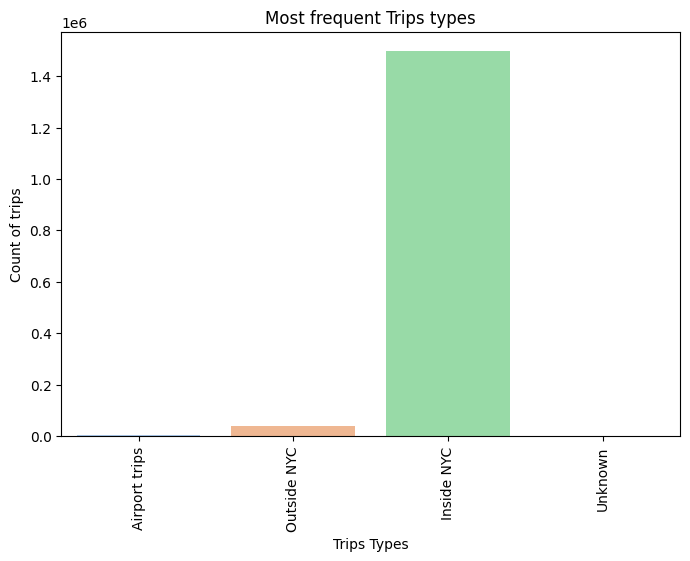

In [16]:
airport_trips = df[(df['Rate type'] == 'JFK') | (df['Rate type'] == 'Newark')].shape[0]
outside_NYC_trips = df[(df['Rate type'] == 'Negotiated fare') | (df['Rate type'] == 'Nassau or Westchester')].shape[0]
unknown_trips = df[df['Rate type'] == 'Unknown'].shape[0]
inside_NYC_trips = df[(df['Rate type'] == 'Group ride') | (df['Rate type'] == 'Standard rate')].shape[0]

x_axis = ['Airport trips', 'Outside NYC', 'Inside NYC', 'Unknown']
y_axis = [airport_trips, outside_NYC_trips, inside_NYC_trips, unknown_trips]

draw_bar_chart(y_axis, x_axis, 'Trips Types', 'Count of trips', 'Most frequent Trips types')

###### Trip Types
- Airport trips : trips of rate type JFK or Newark

- Outside NYC : trips of rate type is 'Negotiated fare' or 'Nassau or westcwester'

- Inside NYC : trips of rate type 'Group ride' or 'Standard rate'

- Unknown : trips of rate type Unknown and mostly they are the cancelled trips

##### It can be seen that most  of the trips were inside NYC, fewer were Outside NYC, and Airport trips were as few as the Unknown trips.

##### 1.c - What are the frequency of trips among the week?

C:\Users\admin\AppData\Local\Temp\ipykernel_12308\3940626759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=y_values, palette='pastel')


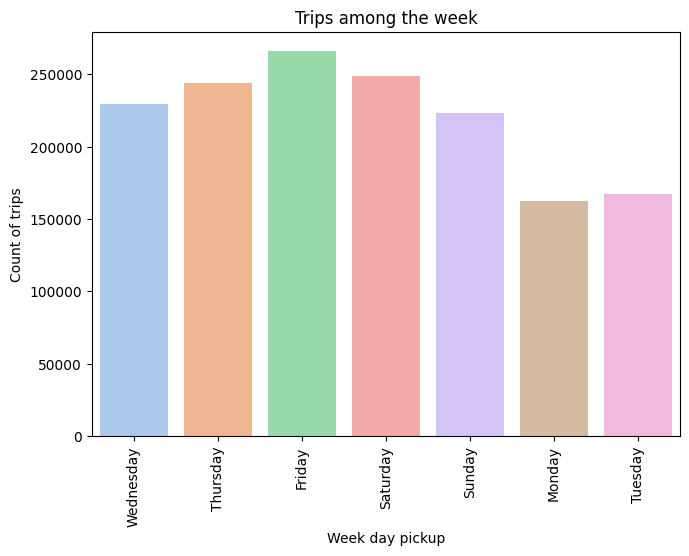

In [17]:
def get_day_fom_trip(pickup_datetime):
    return (int(pickup_datetime.split('-')[2][0:2])-1)%7

df['weekday'] = df['lpep pickup datetime'].apply(get_day_fom_trip)
day_trips_count = df.groupby('weekday').size()

x_axis = ['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']
draw_bar_chart(day_trips_count, x_axis, 'Week day pickup', 'Count of trips', 'Trips among the week')

- After looking online, Wednesday was theh first day in July 2015, I extracted the day from the pickup datetime to analyze the number of trips among the week.

- It can be seen that Friday is the maximum day for trips, followed by Thursday and saturday equivantly, The least are Monday and Tuesday (little bit weird for the first two days in the work).

##### 1.d - What are the frequency of trips among the day hours?

C:\Users\admin\AppData\Local\Temp\ipykernel_12308\3940626759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=y_values, palette='pastel')


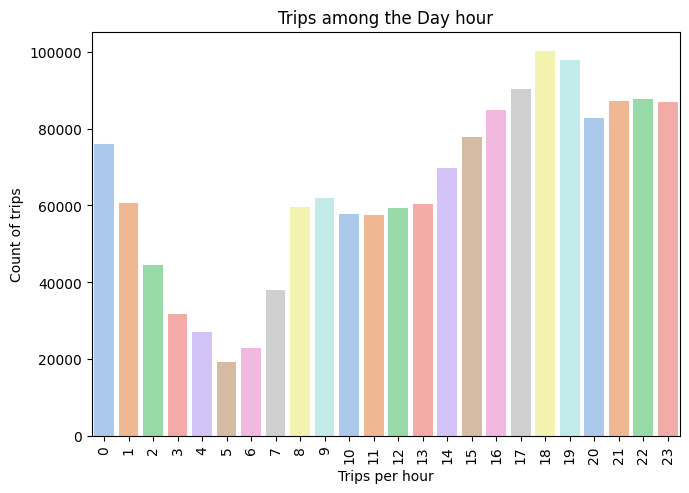

In [18]:
def get_hour_from_trip(pickup_datetime):
    return (int(pickup_datetime.split('-')[2][3:5]))

df['hour'] = df['lpep pickup datetime'].apply(get_hour_from_trip)
hour_trips_count = df.groupby('hour').size()
draw_bar_chart(hour_trips_count, hour_trips_count.index, 'Trips per hour', 'Count of trips', 'Trips among the Day hour')

- It can be seen that most of the trips are on the hours 17:00, 18:00 and 19:00.

- These hours are the rush hours and the workday end.

- Guess : Most of the trips and rides of the NYC taxis are for commuting back from work.

##### 1.e - What are the Most favourite pickup locations for the trips?

C:\Users\admin\AppData\Local\Temp\ipykernel_12308\3940626759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=y_values, palette='pastel')


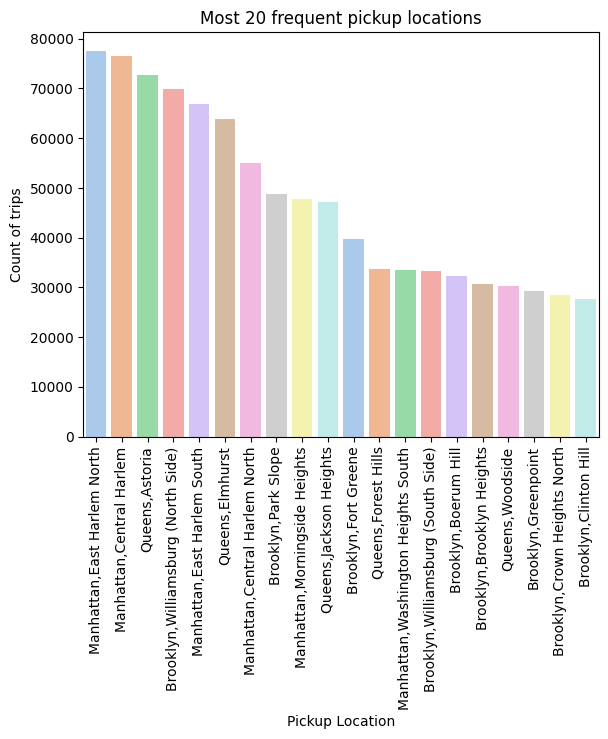

In [19]:
trips_by_location = df.groupby('PU Location').size()
sorted_trips_by_location = trips_by_location.sort_values(ascending = False)
draw_bar_chart(sorted_trips_by_location.values[0:20], sorted_trips_by_location.index.to_numpy()[0:20], 'Pickup Location', 'Count of trips', 'Most 20 frequent pickup locations')

- These are the most 20 frequent trips pickup locations.

- We can see Manhattan, East Harlem North and Manhattan, Central Harlem are the most consumers for the taxis in July 2015 (Ma3ahom feloos b2a, l 3arabyat 3nd l mekaneky t2reban).

C:\Users\admin\AppData\Local\Temp\ipykernel_12308\3940626759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=y_values, palette='pastel')


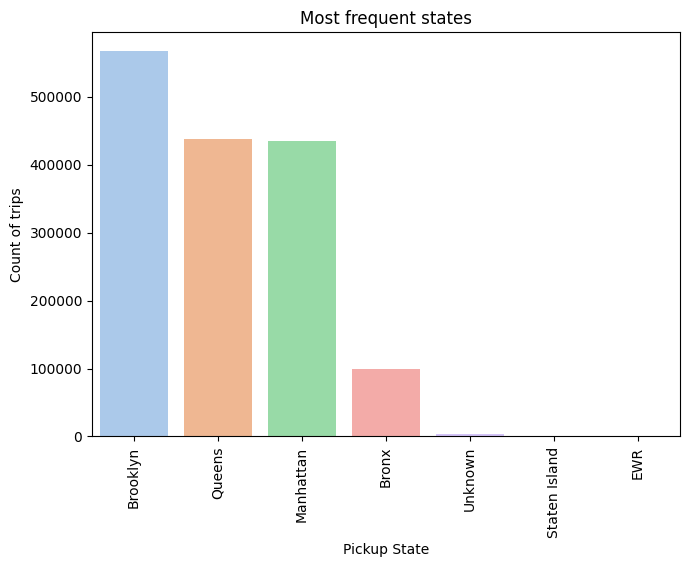

In [20]:
def get_state(pickup_location):
    return str(pickup_location).split(',')[0]
    

df['state'] = df['PU Location'].apply(get_state)
states_grouped = df.groupby('state').size()
sorted_states_grouped = states_grouped.sort_values(ascending = False)
draw_bar_chart(sorted_states_grouped.values, sorted_states_grouped.index.to_numpy(), 'Pickup State', 'Count of trips', 'Most frequent states')

- The State with most frequent trips is the Brooklyn state, followed by Queens and Manhattan.

- Why do we have Unknown state as pickup location? (Above we saw that drop off Unknown wasa related to Unknown rate type with many hypothesis above), But why pick up? Let's see

In [21]:
df[df['state'] == 'Unknown'].head()

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,...,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge,weekday,hour,state
256,VeriFone Inc.,2015-07-01 00:09:09,2015-07-01 00:09:11,N,Negotiated fare,"Unknown,NV","Manhattan,Central Harlem",1.0,0.00,7.0,...,0.0,NaN,0.0,7.00,Credit card,Dispatch,NaN,0,0,Unknown
1432,VeriFone Inc.,2015-07-01 00:52:29,2015-07-01 00:52:34,N,Standard rate,"Unknown,Unknown","Unknown,Unknown",2.0,0.00,2.5,...,0.0,NaN,0.3,3.80,Cash,Street-hail,NaN,0,0,Unknown
2482,VeriFone Inc.,2015-07-01 01:40:57,2015-07-01 01:40:59,N,Standard rate,"Unknown,NV","Queens,Jackson Heights",2.0,0.02,2.5,...,0.0,NaN,0.3,3.80,Cash,Street-hail,NaN,0,1,Unknown
2728,VeriFone Inc.,2015-07-01 01:13:16,2015-07-01 01:13:17,N,Standard rate,"Unknown,NV","Brooklyn,Flatbush/Ditmas Park",1.0,0.00,2.5,...,0.0,NaN,0.3,3.80,Cash,Street-hail,NaN,0,1,Unknown
3559,"Creative Mobile Technologies, LLC",2015-07-01 02:27:46,2015-07-01 02:32:35,N,Standard rate,"Unknown,NV","Brooklyn,Greenpoint",1.0,1.20,6.0,...,0.0,NaN,0.3,8.75,Credit card,Street-hail,NaN,0,2,Unknown


#### Why could the Pickup state be unknown?

- 1. Maybe the trip was cancelled before starting ( distance in that case should be 0)
- 2. Maybe the coordinates of the pickup location is not matched in the vendor's server for a specific location (It is a trip that was in a random cooridnates like in the middle of highway for example)
- 3. Maybe these are locations outside NYC (in that case the rate type should be Nassau or Weschwester or Negotiated fare) 

In [22]:
df[df['state'] == 'Unknown']['trip distance'].value_counts()

trip distance
0.00     1258
0.01       40
1.00       39
1.20       39
0.90       37
         ... 
12.70       1
5.72        1
4.34        1
6.26        1
16.10       1
Name: count, Length: 552, dtype: int64

- Hypothesis 1 : Most of the trips with pick up unknown state are of 0 distance and this means that this hypothesis may be correct and these are trips that are cancelled before even starting.

In [23]:
df[df['state'] == 'Unknown']['Rate type'].value_counts()

Rate type
Standard rate            1742
Negotiated fare          1116
JFK                        46
Nassau or Westchester      25
Newark                     15
Unknown                    13
Name: count, dtype: int64

- Hypothesis 3 : Actually most of the trips are Standard rate (Inside NYC or towards NYC), and it is around more than half of the data and the other half of the Unknown pick up are Negotiated fare (Outside NYC).
- This hypothesis is weakly defended and it may be end up as a false hypothesis.

##### 1.f - What are the payment types and what are the most used?

In [24]:
df['payment type'].unique()

array(['Credit card', 'Cash', nan, 'Dispute', 'No charge', 'Uknown'],
      dtype=object)

- Credit card : Payment is done instantly to the Vendor's account using the credit card of the customer (Not a prepaid trip).
- Cash : Payment by hand from the customer.
- Dispute : I guess it is passenger unsatisfied and would like to make a report or reverse the transaction (Passenger is getting his money back).
- No charge : I guess it is something like prepaid cards from the comapnies and the passenger pay with this card (So the already the money of the trip is inside the vendor's account and the prepaid card remaining amount is just updated for the passenger).
- Unknown : It is most probably the Cancelled trips.

              NegativeMoney  PositiveMoney
payment type                              
Cash                    239         801969
Credit card               1         677545
Dispute                 875           3505
No charge              1408           3596
Uknown                    0             47


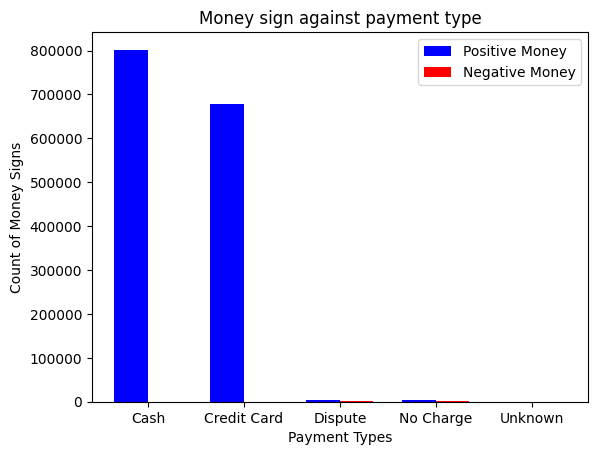

In [25]:
df['amount_sign'] = df['total amount'].apply(lambda x: 'Negative' if x < 0 else 'Positive' )

result = df.groupby('payment type').agg(
    NegativeMoney=('amount_sign', lambda x: (x == 'Negative').sum()),
    PositiveMoney=('amount_sign', lambda x: (x == 'Positive').sum())
)

x_axis = ['Cash', 'Credit Card', 'Dispute', 'No Charge', 'Unknown']
positive_axis = result['PositiveMoney']
negative_axis = result['NegativeMoney']

print(result)

df = df.drop('amount_sign', axis=1)

def draw_two_features(x_axis, y1_axis, y2_axis, y1_label, y2_label, x_label, y_label, title):
    fig, ax = plt.subplots()
    width = 0.35
    ind = np.arange(len(x_axis))
    # Plot Feature 1
    ax.bar(ind - width/2, y1_axis, width, label=y1_label, color='blue')
    # Plot Feature 2
    ax.bar(ind + width/2, y2_axis, width, label=y2_label, color='red')
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    ax.set_xticks(ind)
    ax.set_xticklabels(x_axis)
    ax.legend()
    plt.show()
    
    
draw_two_features(x_axis, positive_axis, negative_axis, 'Positive Money', 'Negative Money', 'Payment Types', 'Count of Money Signs', 'Money sign against payment type')

- These are the negative payments against positive payments for each payment type.

- The negative payments represent the reporting and taking money back from the Vendor account due to something gone wrong in the trip or billing issues or any type of issues.

C:\Users\admin\AppData\Local\Temp\ipykernel_12308\3940626759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=y_values, palette='pastel')


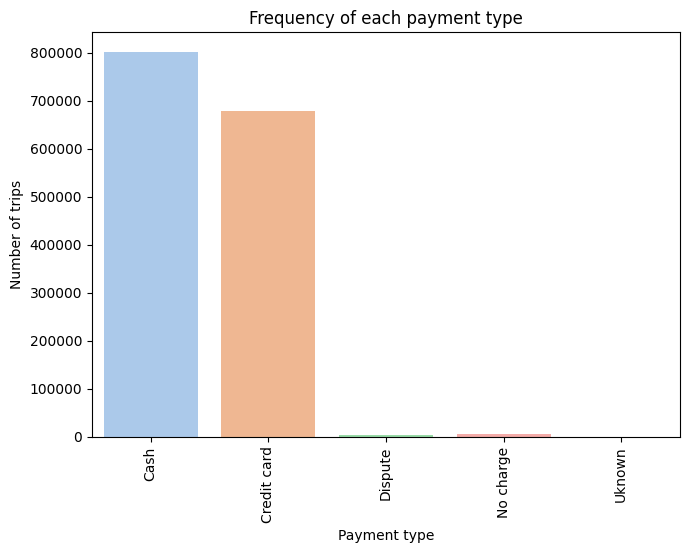

In [26]:
trips_by_payment_type = df.groupby('payment type').size()
draw_bar_chart(trips_by_payment_type.values, trips_by_payment_type.index.to_numpy(), 'Payment type', 'Number of trips', 'Frequency of each payment type')

- Cash is the most frequent payment types in our dataset, followed by Credit card.
- Dispute is very very small amount as it is a rare case that a passenger has a trouble or issue with the ride.

#### 2 - Multivariate EDA

##### 2.a - What is the relation between trip distance and total amount ?

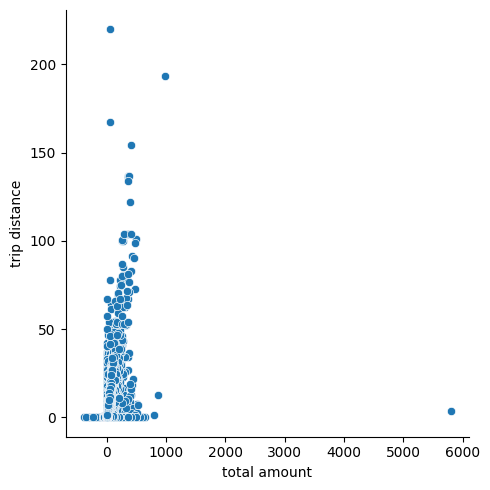

In [27]:
sns.relplot(data=df, x="total amount", y="trip distance", kind="scatter")

- It is shown here that we have some large distances that are of very small total cost.
- On the other hand we have also some trips of very large total cost with very small trip distances
- Let's have a look on these records with trip distance = 0
- Potential Outliers here on both the total amount and the trip distance as well ( Will be discussed in future sections )

In [28]:
df[df['trip distance'] == 0]

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,...,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge,weekday,hour,state
3,VeriFone Inc.,2015-07-01 00:48:41,2015-07-01 00:54:24,N,Standard rate,"Brooklyn,Brownsville","Brooklyn,East Flatbush/Remsen Village",1.0,0.0,5.00,...,0.0,NaN,0.3,7.56,Credit card,Street-hail,NaN,0,0,Brooklyn
4,VeriFone Inc.,2015-07-01 00:56:28,2015-07-01 01:07:45,N,Standard rate,"Brooklyn,East Flatbush/Remsen Village","Brooklyn,Brownsville",1.0,0.0,8.00,...,0.0,NaN,0.3,11.16,Credit card,Street-hail,NaN,0,0,Brooklyn
227,VeriFone Inc.,2015-07-01 00:53:44,2015-07-01 00:53:46,N,Negotiated fare,"Bronx,Hunts Point","Bronx,Hunts Point",1.0,0.0,15.00,...,0.0,NaN,0.0,18.00,Credit card,Dispatch,NaN,0,0,Bronx
248,VeriFone Inc.,2015-07-01 00:52:58,2015-07-01 00:58:49,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,East Williamsburg",1.0,0.0,5.00,...,0.0,NaN,0.3,6.30,Cash,Street-hail,NaN,0,0,Brooklyn
251,VeriFone Inc.,2015-07-01 00:32:59,2015-07-01 00:33:06,N,JFK,"Manhattan,Central Harlem","Manhattan,Central Harlem",1.0,0.0,52.00,...,0.0,NaN,0.3,52.80,Cash,Street-hail,NaN,0,0,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541386,VeriFone Inc.,2015-07-31 23:35:06,2015-07-31 23:35:08,N,Negotiated fare,"Bronx,Mott Haven/Port Morris","Bronx,Mott Haven/Port Morris",1.0,0.0,-7.80,...,0.0,NaN,0.0,-7.80,No charge,Dispatch,NaN,2,23,Bronx
1541387,VeriFone Inc.,2015-07-31 23:35:06,2015-07-31 23:35:08,N,Negotiated fare,"Bronx,Mott Haven/Port Morris","Bronx,Mott Haven/Port Morris",1.0,0.0,7.80,...,0.0,NaN,0.0,7.80,Cash,Dispatch,NaN,2,23,Bronx
1541431,VeriFone Inc.,2015-07-31 23:51:26,2015-07-31 23:51:29,N,Negotiated fare,"Manhattan,Washington Heights South","Manhattan,Washington Heights South",1.0,0.0,10.00,...,0.0,NaN,0.0,10.00,Credit card,Dispatch,NaN,2,23,Manhattan
1541549,VeriFone Inc.,2015-07-31 23:32:54,2015-07-31 23:32:56,N,Negotiated fare,"Bronx,Van Cortlandt Village","Bronx,Van Cortlandt Village",4.0,0.0,10.00,...,0.0,NaN,0.0,10.00,Cash,Dispatch,NaN,2,23,Bronx


- These trips of distance 0 are most probably cancelled trips, and the total amount here are may be the predicted cost of the original trip that was cancelled, but not the actual paid as these are mostly cancelled trips.

- Another hypothesis could be that the taximeter broke down and the trip is interrupted and in that case these records represent wrong data because of error in the taximeter itself.

##### 2.b - What is the relation between trip distance and trip duration (in seconds) ?

In [29]:
def get_trip_duration_in_seconds(x):
    #string representing a date and time
    date_string1 = x['lpep pickup datetime'] 
    date_string2 = x['lpep dropoff datetime']

    # Define the format of the input string
    format_string = "%Y-%m-%d %H:%M:%S"

    # Parse the string into a datetime object
    datetime_object1 = datetime.strptime(date_string1, format_string)
    datetime_object2 = datetime.strptime(date_string2, format_string)
    return (datetime_object2 - datetime_object1).total_seconds()

df['duration'] = df.apply(get_trip_duration_in_seconds, axis = 1)

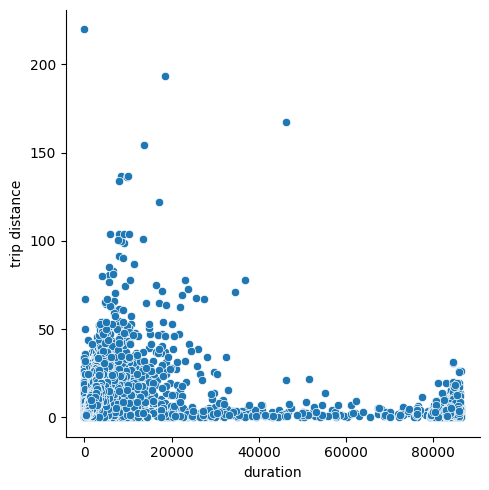

In [30]:
sns.relplot(data=df, x="duration", y="trip distance", kind="scatter")

- We can see some trips of very large distance and with very small duration. This could could be noise and wrong data because this one would be moving with around 200 miles/second which is impossible to happen, another hypothesis could be that the taximeter wasn't reset from the previous trip, or lastly the driver entered the data incorrectly while sending the trip to the vendor's server and he clicked more digits accidently.

- We can also see trips with very large duration but with very small distance (or nearly 0 distance), this may be because the trip was cancelled but the taximetr wasn't reset (timer) and the driver was waiting for the next trip.

##### 2.c - What is the relation between trip distance and the day hours ?

<Axes: xlabel='hour', ylabel='trip distance'>

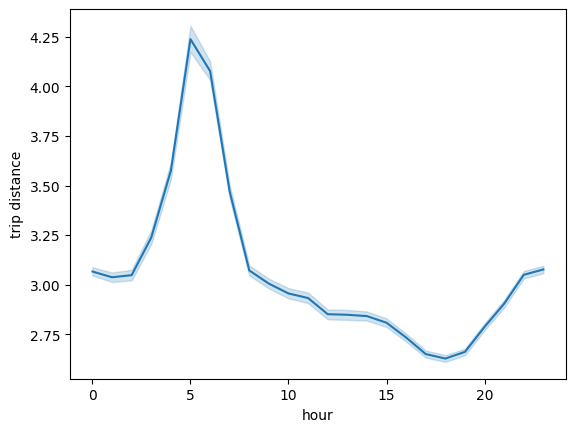

In [31]:
sns.lineplot(data=df, x="hour", y="trip distance")

- The distance is the longest around 5:00 AM along July Month 2015

# 3 - Cleaning Data

## Tidying up column names

In [32]:
df.head(2)

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,...,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge,weekday,hour,state,duration
0,VeriFone Inc.,2015-07-01 00:12:55,2015-07-01 00:16:53,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bushwick South",1.0,0.88,5.0,...,NaN,0.3,7.88,Credit card,Street-hail,NaN,0,0,Brooklyn,238.0
1,VeriFone Inc.,2015-07-01 00:38:35,2015-07-01 00:49:22,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Queens,Ridgewood",1.0,3.00,11.0,...,NaN,0.3,14.76,Credit card,Street-hail,NaN,0,0,Brooklyn,647.0


In [33]:
def format_column_name(column_name):
    return column_name.lower().replace(' ', '_')

formatted_columns = {col: format_column_name(col) for col in df.columns}

df.rename(columns=formatted_columns, inplace=True)


In [34]:

df.rename(columns={"lpep_pickup_datetime": "pickup_datetime",
                  "lpep_dropoff_datetime" : "dropoff_datetime",
                  }, inplace=True)

In [35]:
df.head(2)

,vendor,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,weekday,hour,state,duration
0,VeriFone Inc.,2015-07-01 00:12:55,2015-07-01 00:16:53,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bushwick South",1.0,0.88,5.0,...,NaN,0.3,7.88,Credit card,Street-hail,NaN,0,0,Brooklyn,238.0
1,VeriFone Inc.,2015-07-01 00:38:35,2015-07-01 00:49:22,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Queens,Ridgewood",1.0,3.00,11.0,...,NaN,0.3,14.76,Credit card,Street-hail,NaN,0,0,Brooklyn,647.0


### Adjusting the datetime type

In [36]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df.dtypes

vendor                           object
pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
store_and_fwd_flag               object
rate_type                        object
pu_location                      object
do_location                      object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                     object
trip_type                        object
congestion_surcharge            float64
weekday                           int64
hour                              int64
state                            object
duration                        float64
dtype: object

### Handling Duplicates

In [37]:
df.shape

(1541683, 24)

In [38]:
df = df.drop_duplicates()
df.shape

(1541675, 24)

- We had 8 rows duplicates, they were identitcal in all the column values.

## Observing inconsistent data

- Creating the Lookup table

In [39]:
lookup = pd.DataFrame(columns=['Column name', 'Original value', 'Imputed value'])
lookup

,Column name,Original value,Imputed value


In [40]:
locations_lookup = pd.DataFrame(columns=['Column name', 'Original value', 'Imputed value'])
locations_lookup

,Column name,Original value,Imputed value


In [41]:
def update_lookup(lookup, feature_name, old_value, new_value):
    lookup_entry = pd.DataFrame([[str(feature_name), str(old_value), str(new_value)]], columns=lookup.columns)
    lookup = pd.concat([lookup, lookup_entry])
    return lookup


### Pickup datetimes

In [42]:
df['pickup_datetime'].value_counts()

pickup_datetime
2015-07-23 19:27:53    8
2015-07-10 20:06:08    8
2015-07-24 16:22:24    8
2015-07-24 23:00:57    8
2015-07-25 23:42:48    8
                      ..
2015-07-13 01:11:38    1
2015-07-13 01:25:48    1
2015-07-13 01:22:38    1
2015-07-13 01:04:50    1
2015-08-01 00:03:09    1
Name: count, Length: 1115422, dtype: int64

- It can be seen here that a trip is in month august here, so there maybe many records outside Month july (Month of interest), and these will represent inconsistent data in that case.

In [43]:
def get_month(datetime):
    return datetime.dt.month

def get_year(datetime):
    return datetime.dt.year

def handle_data_outside_timeframe(df, target_month, target_year):
    index_to_be_deleted = df[(get_month(df['pickup_datetime']) != target_month) | (get_year(df['pickup_datetime']) != target_year)].index
    df.drop(index_to_be_deleted , inplace=True)


In [44]:
df[get_month(df['pickup_datetime']) != 7]

,vendor,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,weekday,hour,state,duration
1541671,VeriFone Inc.,2015-08-01 00:07:53,2015-08-01 00:20:37,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Manhattan,Two Bridges/Seward Park",1.0,1.65,10.0,...,NaN,0.3,12.30,Credit card,Street-hail,NaN,0,0,Brooklyn,764.0
1541672,VeriFone Inc.,2015-08-01 00:39:48,2015-08-01 00:52:49,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Crown Heights North",1.0,2.48,11.0,...,NaN,0.3,14.00,Credit card,Street-hail,NaN,0,0,Brooklyn,781.0
1541673,VeriFone Inc.,2015-08-01 00:52:12,2015-08-01 00:53:32,N,Standard rate,"Brooklyn,Stuyvesant Heights","Brooklyn,Crown Heights North",1.0,0.12,3.0,...,NaN,0.3,4.30,Cash,Street-hail,NaN,0,0,Brooklyn,80.0
1541674,"Creative Mobile Technologies, LLC",2015-08-01 00:03:09,2015-08-01 00:07:14,N,Standard rate,"Brooklyn,Crown Heights North","Brooklyn,Crown Heights North",1.0,0.50,4.5,...,NaN,0.3,6.95,Credit card,Street-hail,NaN,0,0,Brooklyn,245.0


- As we can see we have 4 records of inconsistent pickup datetime as they are in different month and out the month of interest for analyszing the data.

- In that case we will drop these records as they are outside of our business logic and question.

In [45]:
df[get_year(df['pickup_datetime']) != 2015]

,vendor,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,weekday,hour,state,duration


- We don't have any records outside 2015

In [46]:
handle_data_outside_timeframe(df, 7, 2015)

### Dropoff Datetime

#### Check if there are trips that have Drop off datetitme before their pickup datetitmes 
- This can be done easily as we already had a duration feature that represents the duration in seconds by subtracting the drop off and pick off in the EDA part.

In [47]:
df[df['duration'] < 0]

,vendor,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,weekday,hour,state,duration


- All good we don't have problems with the Drop off, and we don't need to check if there are any trips has drop off in August as we are now 100% all our pickup datetimes are in July but if any drop off is in august we are still interested in the trip as it is counted as a trip in July as well.

### Store and Fwd flag

In [48]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1531269
Y      10402
Name: count, dtype: int64

- The Store and Forward flag data is all good and it doesn't have inconsistencies or different representations for the same value.

### Passenger Count

In [49]:
df['passenger_count'].value_counts()

passenger_count
1.0      1293914
2.0       118427
5.0        57703
3.0        35436
6.0        25225
4.0        10357
8.0           41
7.0           37
9.0           10
222.0          6
Name: count, dtype: int64

- Here we can see some records for passengers have passenger count with 222 in the trip, this is physically impossible for having a taxi that can hold up to 222 passengers, so this record is a noise not a real outlier.
- My guess is that the driver mis clicked when entering the record and it was actually 2 not 222 specially the same digit itself was repeated multiple times.
- So i will replace them with 2 in that case.

In [50]:
def remove_passenger_count_noise(df):
    noise_condition = df.passenger_count > 10
    
    def get_first_dig(num):
        return (float)(str(num)[0])
    
    df.loc[noise_condition, 'passenger_count'] = get_first_dig(df[noise_condition].passenger_count)


In [51]:
remove_passenger_count_noise(df)

df[df.passenger_count > 10]

,vendor,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,weekday,hour,state,duration


In [52]:
df[df['passenger_count'] == 0]

,vendor,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,weekday,hour,state,duration


- Update the lookup table with that change

In [53]:
lookup = update_lookup(lookup, 'Passenger Count', 222, 2)
lookup

,Column name,Original value,Imputed value
0,Passenger Count,222,2


- We don't have trips of passenger count = 0 (COOL).

### Trip Duration

- The distance is correlated with the trip duration, it is hard find inconsistencies and weird data if we don't compare the distance with the trip_duration as well.
- So i will create a new feature which is the average velocity to be able to compare and observe inconsistiencies better.
- This feature represents the average velocity in the whole trip in miles/second

In [54]:
df['velocity'] = df['trip_distance'] / df['duration']

In [55]:
df['velocity'].value_counts()

velocity
0.000000    20828
0.002500     2591
0.003333     2486
0.002857     2122
0.004000     2078
            ...  
0.007831        1
0.007096        1
0.009479        1
0.010565        1
0.002689        1
Name: count, Length: 370262, dtype: int64

#### Check super short trips

In [56]:
df[(df['duration'] < 30)]['velocity'].value_counts()

velocity
0.000000    11849
0.010000      186
0.005000      165
0.002500      149
0.003333      147
            ...  
0.480000        1
6.850000        1
0.065385        1
1.420000        1
0.088235        1
Name: count, Length: 1438, dtype: int64

Inconsistencies can be noticed here in the trips with very short duration (less than 30 seconds), We can very high speed here which is 6.85 miles per seconds ( Impossible to happen currently :"D ) and this is a weird phenomenen in which we have very short trip durations but with very high trip distance. 

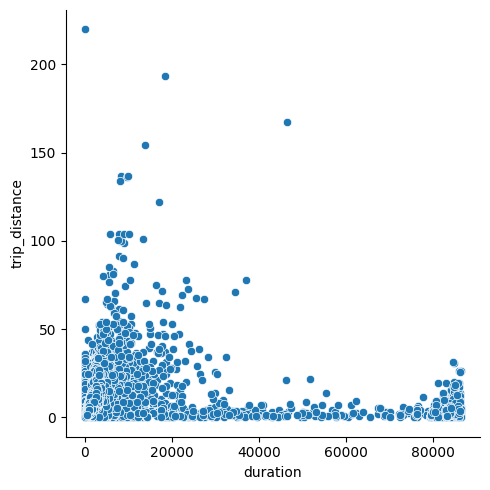

In [57]:
sns.relplot(data=df, x="duration", y="trip_distance", kind="scatter")

- Here is the Inconsistency in the plot, super short trips are of very long distances and vice versa.
- What are the possible reasons for that?
    - I think in the situtation of the short time trip, it was a cancelled trip and the passenger told the driver about his endpoint and taximeter in that case made an estimation for the whole trip and the passenger decided to cancel it.
    - For trips of long distance and short amount of time, I have no clue actually because i think the taximeter is recording time and distance simultounasly. So maybe it is negative time the driver is waiting for a customer maybe and he enabled the taximeter by mistake in that case (and here this is considered as a wrong data).
    - Or maybe the taximeter itself had a fluctuation in the reading and it was incorrect reading from the taximeter and also in that case it will be incorrect data.
- We will handle this issue when handling and dealing with outliers, because as we can see here we have a lot of outliers in both axes, after resolving these outliers the graph should be hopefully better.

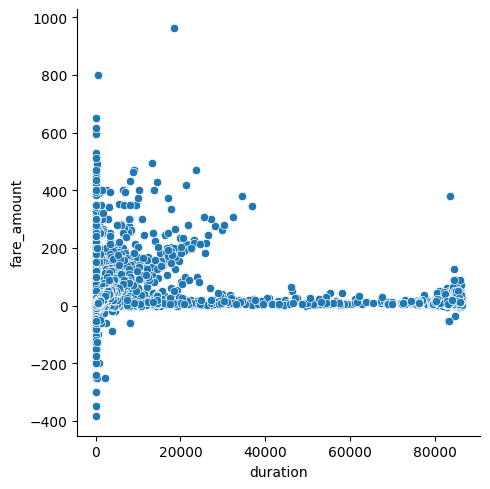

In [58]:
sns.relplot(data=df, x="duration", y="fare_amount", kind="scatter")

- We can also see same problem here, the duration against fare amount is not a logical relationship in our data as well.


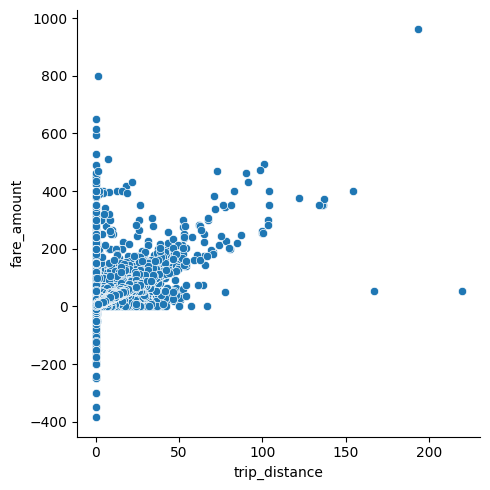

In [59]:
sns.relplot(data=df, x="trip_distance", y="fare_amount", kind="scatter")


- The trip distance against the fare amount is slight better, but still has many outliers and unlogical records in here.

#### Check Money Inconsistencies

In [60]:
money_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']

def caluclate_record_total_amount(x):
    res = 0
    for str in money_columns:
        res += x[str] if not math.isnan(x[str]) else 0
    return float("{:.2f}".format(res))

df['expected_total_amount'] = df.apply(caluclate_record_total_amount, axis=1)
df[df['expected_total_amount'] != df['total_amount']] [money_columns + ['total_amount', 'expected_total_amount']]




,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,expected_total_amount
8130,16.0,NaN,0.5,0.0,0.00,0.3,20.06,16.80
8333,13.5,NaN,0.5,0.0,0.00,0.3,17.06,14.30
18428,24.5,NaN,0.5,0.0,0.00,0.3,30.26,25.30
21508,11.5,NaN,0.5,0.0,0.00,0.3,14.66,12.30
21684,44.0,NaN,0.5,0.0,0.00,0.3,58.09,44.80
...,...,...,...,...,...,...,...,...
1516815,7.5,1.0,0.5,0.0,0.00,0.3,11.94,9.30
1516944,18.0,1.0,0.5,0.0,0.00,0.3,25.59,19.80
1522933,5.5,1.0,0.5,0.0,0.00,0.3,8.30,7.30
1532290,37.0,0.5,0.5,0.0,5.54,0.3,48.84,43.84


- We can see here we have 200 rows with their total amount not equal to the sum of all the other types of money in the record.
- This is inconsistency found here in the money calculation of the total amount and the total amount should be changed to the sum of all the money fields in the record.
- I will change the total_amount to the claculated one from other fields for all these inconsistencies to the expected sum from all other money columns here.

In [61]:

def handle_money_sum_inconsistecny(row):
    money_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']
    res = 0
    for str in money_columns:
        res += row[str] if not math.isnan(row[str]) else 0
    return float("{:.2f}".format(res))

df.total_amount = df.apply(handle_money_sum_inconsistecny, axis = 1)


In [62]:
df[money_columns + ['total_amount']].head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,5.0,0.5,0.5,1.58,0.0,0.3,7.88
1,11.0,0.5,0.5,2.46,0.0,0.3,14.76
2,6.5,0.5,0.5,0.00,0.0,0.3,7.80
3,5.0,0.5,0.5,1.26,0.0,0.3,7.56
4,8.0,0.5,0.5,1.86,0.0,0.3,11.16


#### What are Negative Money ?

In [63]:
df = df.drop('expected_total_amount', axis=1)
df[(df[money_columns] < 0).any(axis=1)]

,vendor,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,weekday,hour,state,duration,velocity
266,VeriFone Inc.,2015-07-01 00:33:07,2015-07-01 00:36:19,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Williamsburg (North Side)",1.0,0.40,-4.00,...,-0.3,-5.30,Dispute,Street-hail,NaN,0,0,Brooklyn,192.0,0.002083
953,VeriFone Inc.,2015-07-01 00:32:41,2015-07-01 00:46:06,N,Standard rate,"Queens,Astoria","Queens,Old Astoria",1.0,0.68,-9.50,...,-0.3,-10.80,Dispute,Street-hail,NaN,0,0,Queens,805.0,0.000845
1526,VeriFone Inc.,2015-07-01 00:24:27,2015-07-01 00:29:21,N,Standard rate,"Brooklyn,Greenpoint","Brooklyn,Williamsburg (North Side)",1.0,0.80,-5.50,...,-0.3,-6.80,Dispute,Street-hail,NaN,0,0,Brooklyn,294.0,0.002721
1606,VeriFone Inc.,2015-07-01 00:37:14,2015-07-01 00:38:42,N,Standard rate,"Manhattan,Central Harlem","Manhattan,Central Harlem",1.0,0.43,-3.50,...,-0.3,-4.80,No charge,Street-hail,NaN,0,0,Manhattan,88.0,0.004886
2538,VeriFone Inc.,2015-07-01 01:14:10,2015-07-01 01:21:23,N,Standard rate,"Brooklyn,DUMBO/Vinegar Hill","Brooklyn,Boerum Hill",1.0,0.78,-6.00,...,-0.3,-7.30,No charge,Street-hail,NaN,0,1,Brooklyn,433.0,0.001801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539225,VeriFone Inc.,2015-07-31 23:25:21,2015-07-31 23:25:59,N,Standard rate,"Queens,Astoria","Queens,Astoria",1.0,0.02,-2.50,...,-0.3,-3.80,No charge,Street-hail,NaN,2,23,Queens,38.0,0.000526
1540550,VeriFone Inc.,2015-07-31 23:37:38,2015-07-31 23:41:43,N,Standard rate,"Queens,Jackson Heights","Queens,Woodside",1.0,0.50,-4.50,...,-0.3,-5.80,No charge,Street-hail,NaN,2,23,Queens,245.0,0.002041
1541053,VeriFone Inc.,2015-07-31 23:00:18,2015-07-31 23:04:24,N,Standard rate,"Brooklyn,Stuyvesant Heights","Brooklyn,Bedford",1.0,0.02,-2.50,...,-0.3,-3.80,No charge,Street-hail,NaN,2,23,Brooklyn,246.0,0.000081
1541384,VeriFone Inc.,2015-07-31 23:32:41,2015-07-31 23:33:45,N,Negotiated fare,"Bronx,Mott Haven/Port Morris","Bronx,Mott Haven/Port Morris",NaN,0.00,-9.06,...,0.0,-9.06,No charge,Dispatch,NaN,2,23,Bronx,64.0,0.000000


- These Negative values has two cases :
- Case 1 : The payment type was either dispute or No charge : Dispute means that the passenger made a problem with the driver and didn't pay for the trip and No charge means that the passenger had a prepaid card (can be from his company or some prepaid cards published from the vendor ) and these cards are like chargable cards and he just pay with the card directly no need for paying by his credit card or the cash in that case, and here the money is given to the vendor directly at the exact time the trip ends so it is negative meaning that it is like out of the vendor.
- Case 2 : The payment type is neither dispute nor No charge, Here my guess in that case would be that the passenger after finishing his trip he felt that the trip is over priced or he had a problem with the service overall and he decided to report it to the authority in that case in NYC it is the vendor company and The NYC Taxi and Limousine Commission (TLC), and then the money of the trip is returned back to the customer in that case.
  

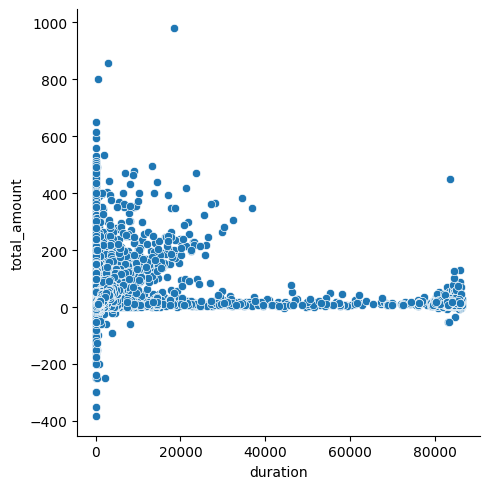

In [64]:
sns.relplot(data=df, x="duration", y="total_amount", kind="scatter")

- This graph represents all the records with negative amount of money against the duration of the trip in seconds, it can be shown that like 90% of these trips has very high absolute value although very short trip duration, this is a good indication that the idea of refunds is a good guess.
- So these trips actually can be considered as refunded trips due to any reason mostly overcharged trips and maybe route manipulations as well.

##### How i am going to handle it?
- For the sake of abstraction, i will add a new column named negative_money (instead of a column stating is it a report or not and a column statig if it is a prepaid trip or not) and this will represent the state of the original record.
- I will change all the negative records to positive ones because we can't rely on the statistical properties of the data when we have some negative values, these negative values have a semantic meaning but when analyzing for example the average fare amount it will give us a wrong insight, So we will convert them to positive and keep the negative flag in case we wanted to revert back to them for any kind of different analysis like trying to figure out problems in some trips, reports and how to improve.
- With this solution we can still have all other insights as well, we didn't lose information about the data because we are still keeping the payment type so we still can know if it was dispute and something went wrong, we can also still know if it was a prepaid trip and with the negative flag we can know which trips were refunded in that case.

In [65]:
df['negative_money'] = df[money_columns].lt(0).any(axis=1)

def handle_negative_money(df):
    money_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
    df[money_columns] = df[money_columns].apply(abs)

    

In [66]:
handle_negative_money(df)

df[df.negative_money == True].head()

,vendor,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,weekday,hour,state,duration,velocity,negative_money
266,VeriFone Inc.,2015-07-01 00:33:07,2015-07-01 00:36:19,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Williamsburg (North Side)",1.0,0.40,4.0,...,5.3,Dispute,Street-hail,NaN,0,0,Brooklyn,192.0,0.002083,True
953,VeriFone Inc.,2015-07-01 00:32:41,2015-07-01 00:46:06,N,Standard rate,"Queens,Astoria","Queens,Old Astoria",1.0,0.68,9.5,...,10.8,Dispute,Street-hail,NaN,0,0,Queens,805.0,0.000845,True
1526,VeriFone Inc.,2015-07-01 00:24:27,2015-07-01 00:29:21,N,Standard rate,"Brooklyn,Greenpoint","Brooklyn,Williamsburg (North Side)",1.0,0.80,5.5,...,6.8,Dispute,Street-hail,NaN,0,0,Brooklyn,294.0,0.002721,True
1606,VeriFone Inc.,2015-07-01 00:37:14,2015-07-01 00:38:42,N,Standard rate,"Manhattan,Central Harlem","Manhattan,Central Harlem",1.0,0.43,3.5,...,4.8,No charge,Street-hail,NaN,0,0,Manhattan,88.0,0.004886,True
2538,VeriFone Inc.,2015-07-01 01:14:10,2015-07-01 01:21:23,N,Standard rate,"Brooklyn,DUMBO/Vinegar Hill","Brooklyn,Boerum Hill",1.0,0.78,6.0,...,7.3,No charge,Street-hail,NaN,0,1,Brooklyn,433.0,0.001801,True


## Findings and Conclusions

- Column names are changed to better form for easier use.
- The type of Pickup and Dropoff datetimes is changed from String to Datetime.
- All trips outside my time frame(July and 2015) are removed because they are outside my analysis focus.
- We had noise data in the passenger count, as it had some records of 222 passenger count and it was replaced with 2 as the hypothesis was that it was written by mistake and having the 3 digits the same gave me that guess.
- A weird inconsistent phenomnen is observed in the multivariate analysis between the trip duration and trip distance, for very short trip in duration they had very large distance and vice versa, this lead to having velocity of very large values and some times even infinite velocity., these phenomnen should be solved after resolving the outliers as most of these records have outlier values in both axes.
- Inconsistencies were found in money attributes, some records money attributes don't sum up to the total sum, so i changed the total sum = the sum of moneya ttributes to be consistent (the difference was small), but only for records that have extra not missing because if an attribute is missing we can impute with the difference or with any other method.
- Another Inconsistency was observed in the sign of the money attributes, so i changed all these negative values to positive values with maintaining the original sign in new feature in case we want to revert back, and i changed them to positive because they won't give me wrong insights if i use their statistical values.
- Finally i found an attribute with mis spelled value and was adjusted. (Payment type)

## Observing and Hanlding Missing Values

In [67]:
df.isna().mean()*100

vendor                     0.000000
pickup_datetime            0.000000
dropoff_datetime           0.000000
store_and_fwd_flag         0.000000
rate_type                  0.000000
pu_location                0.000000
do_location                0.000000
passenger_count            0.033405
trip_distance              0.000000
fare_amount                0.000000
extra                     45.304413
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               3.405266
trip_type                  0.000000
congestion_surcharge     100.000000
weekday                    0.000000
hour                       0.000000
state                      0.000000
duration                   0.000000
velocity                   0.062789
negative_money             0.000000
dtype: float64

### 1 - Passenger Count

- Why the passenger count could be missing?
- Since the passenger count is a value entered by the driver, then most probably the driver forgot to enter the this value in that case in the taximeter, so these data is lost.
- So This value is Missing completely at random (MCAR).
- Since the missingness percentage is 0.033% (very small), and the passenger count is categorical data then i will impute with the mode of the data.

In [68]:
df['passenger_count'] = np.where(df['passenger_count'].isna(), df['passenger_count'].mode()[0], df['passenger_count'])

In [69]:
df.passenger_count.isna().mean()*100

0.0

### 2 - Extra

- According to the dataset description, the extra fees are fees added for overnight trips and rush hour trips.
- So there should be a relationship between the pickup hour of the trip and the extra field.

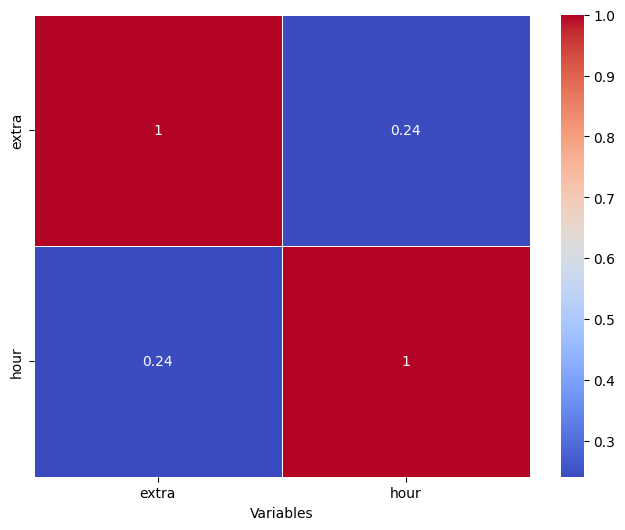

In [70]:
draw_correlation_map(df, ['extra', 'hour'])

- There is a small correlation here, but the problem actually is that the correlation should be bidirectional.
- Because the overnight is from 20:00 to 5:00 for example and the rush hour could be 16:00 to 17:00.
- So the extra amount should be increasing with increasing hour and at the same time decreasing at decreasing hours.

In [71]:
df.extra.value_counts()

extra
0.50    590881
1.00    252344
0.67         1
Name: count, dtype: int64

In [72]:
df[df.extra == 1].hour.describe()

count    252344.000000
mean         17.537603
std           1.351473
min           0.000000
25%          17.000000
50%          18.000000
75%          19.000000
max          23.000000
Name: hour, dtype: float64

- We can see here the 25th and 75th quantiles are at the rush hour for extra fees = 1, yes some hours are still outside the rush hour with extra fees = 1, but the majority still holding it.

In [73]:
df[df.extra == 0.5].hour.describe()

count    590881.000000
mean         13.047458
std           9.862745
min           0.000000
25%           2.000000
50%          20.000000
75%          22.000000
max          23.000000
Name: hour, dtype: float64

- Same idea here for the extra 0.5 as well.

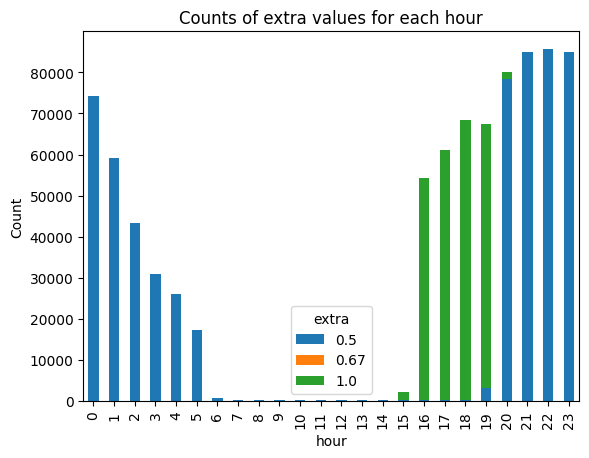

In [74]:
result = df.groupby('hour')['extra'].value_counts().unstack(fill_value=0)
result.plot(kind='bar', stacked=True)

plt.title('Counts of extra values for each hour')
plt.xlabel('hour')
plt.ylabel('Count')
plt.legend(title='extra')
plt.show()

- The plot here is confirming the observations above, and confirming that most of the extra fees are either overnight (0.5 usd) or rush hour (1 usd).

- I will impute the missing values of extra hours as follows:
    - Rush hours (16:00 until 19:00): Impute with 0.5
    - Overnight (20:00 until 5:00): Impute with 1
 

In [75]:
def handle_extra_fees(row):
    if(not pd.isna(row['extra']) and row['extra'] != 0.67):
        return row['extra']
    if(row['hour'] >= 16 and row['hour'] <= 19):
        return 1
    elif ((row['hour'] >= 20 and row['hour'] <= 23) or (row['hour'] >= 0 and row['hour'] <= 5)):
        return 0.5
    return 0


In [76]:
df['extra'] = df.apply(handle_extra_fees, axis = 1)

df['extra'].isna().mean()*100

0.0

### 3- Ehail fee

- This attribute is Missing not at random (MNAR), Because in 2015 there wasn't online booking system fo taxi trips, so the value is not found.
- If the attribute is found that means that it was booked online, so there is a relationship between the presence of the value and the meaning of the value itself, Hence MNAR.
- I will impute the value with 0, i don't like to drop it because if we integrate this dataset with other one that has the ehail-fee we won't run into some problems in unifying the schema for the integration.
- Solution : I will impute the value with 0 since it is not here from the begining.

In [77]:
df['ehail_fee'] = 0

df.ehail_fee

0          0
1          0
2          0
3          0
4          0
          ..
1541666    0
1541667    0
1541668    0
1541669    0
1541670    0
Name: ehail_fee, Length: 1541671, dtype: int64

- Update the lookup table with that change

In [78]:
lookup = update_lookup(lookup, 'Ehail Fee', 'Nan', 0)
lookup

,Column name,Original value,Imputed value
0,Passenger Count,222,2
0,Ehail Fee,Nan,0


### 4- Congestion surcharge

- Congestion surcharge is a value added on the trips that pass by areas that have very high congestion as Manhattan.
- This value was added in 2019, so in my dataset for sure we don't have it.
- This value is Missing not at random (MNAR), because having it missing means that the congestion surcharge is not found, a relationship between the value presence and the value itself.
- I will impute it with 0 as well with the same reasoning as the ehail fee attribute.

In [79]:
df['congestion_surcharge'] = 0

df.congestion_surcharge

0          0
1          0
2          0
3          0
4          0
          ..
1541666    0
1541667    0
1541668    0
1541669    0
1541670    0
Name: congestion_surcharge, Length: 1541671, dtype: int64

- Update the lookup table with that change

In [80]:
lookup = update_lookup(lookup, 'Congestion Surcharge', 'Nan', 0)
lookup

,Column name,Original value,Imputed value
0,Passenger Count,222,2
0,Ehail Fee,Nan,0
0,Congestion Surcharge,Nan,0


### 5- Payment type

- Why could the Payment type be missing?
    - Maybe the value inserted to the taximeter weren't recorded (problem with the taximeter itself).
    - Maybe the driver forgot to enter the value.
    - Maybe the data is lost when the trip was stored in the taxi by the store and forward flag, and when it was being sent after that the data is lost while being saved on the car.
    - Another guess could be that the driver wasn't sure exactly about the payment type itself or didn't know it (but in that case i guess also it shoul be unknown).


- Guess1 : Problem with the taximeter.
    - We have two vendors each is providing a different taximeter, so let's check for those taximeters.

<Axes: xlabel='payment_type'>

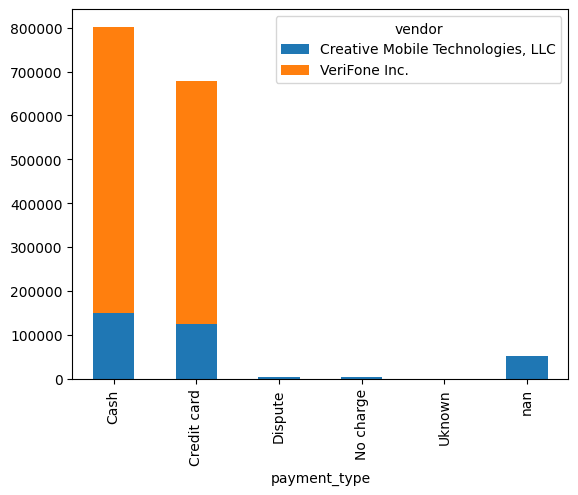

In [81]:
result = df.groupby('payment_type', dropna=False)['vendor'].value_counts().unstack(fill_value=0)
result.plot(kind='bar', stacked=True)

- Here if we look at the Nan, we can see that when the payment type is Nan it is always the case that the taximeter is from the Vendor 'Creative Mobile Technologies, LLC'.
- In some other cases this taximeter works fine, but according to this plot we can see that it is the only one that may fail in the payment_type field.
- This is a good defending for the first guess.
- The second guess is hard to find a pattern supporting it in the data, as we won't know if the driver forgot or not from the data.

- Third Guess:
    - Checking if there is a relation between the store and fwd flag and the payment type.

<Axes: xlabel='payment_type'>

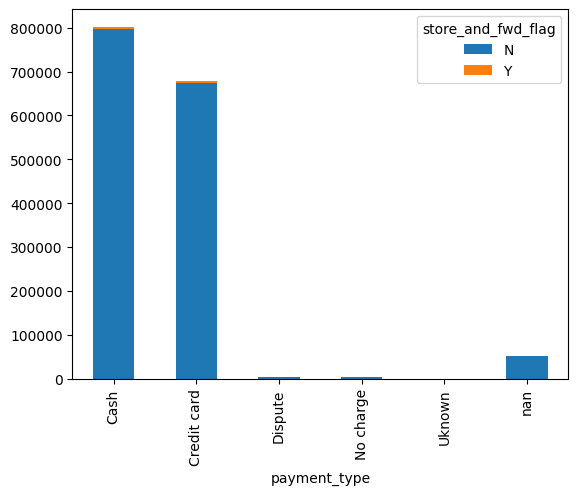

In [82]:
result = df.groupby('payment_type', dropna=False)['store_and_fwd_flag'].value_counts().unstack(fill_value=0)
result.plot(kind='bar', stacked=True)

- These are the results here, it shows that nearly all the trips have N store and fwd and wasn't stored in the car.
- Also all the records with missing payment type are not stored in the car which violates our guess, we can not also draw a clear correlation here because nearly all the data have store_fwd N.

- So the Payment type is Missing at Random (MAR), there was a relationship between it and the vendor's taximeter used.
- I will replace the missing values with the mode, because the data is categorical, and payment_type doesn't have strong relationships with other attributes.

In [83]:
df.payment_type.fillna(df.payment_type.mode()[0], inplace=True)
df.payment_type.isna().mean()*100

0.0

## Findings and Conclusions

- 5 columns were found with missing values.
- Passenger count categorical data imputed with the median.
- Extra amount was imputed based on the pickup hour of the trip wether it was overnight or rush-hour.
- Ehail fee was imputed with arbitary value 0 intead of dropping it.
- Congestion surcharge was imputed with arbitary value 0 intead of dropping it.
- Payment type was imputed with the mode of the data.

## Observing and Hanlding Outliers

In [84]:
def plot_distribution(df, column_name):
    # Create a figure with subplots
    _, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    # Plot Boxplot
    sns.boxplot(x=df[column_name], ax=axes[0])
    axes[0].set_title('Box Plot')

    # Plot KDE (Kernel Density Estimate)
    sns.kdeplot(df[column_name], ax=axes[1])
    axes[1].set_title('KDE Distribution')

    # Plot Histogram
    sns.histplot(df[column_name], kde=False, ax=axes[2])
    axes[2].set_title('Histogram')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

In [85]:
def interquantile_test(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    return [lower_bound, upper_bound]

In [86]:
def zscore_test(df, column, std_units):
    lower_bound = df[column].mean() - (std_units * df.tip_amount.std())
    upper_bound = df[column].mean() + (std_units * df.tip_amount.std())

    return [lower_bound, upper_bound]

### 1 - Passenger Count

- Passenger count is categorical data, and in categorical data we don't have the concept of outliers.
- We already handled a noisy records for the passenger count above, We also know that the limit of passengers allowed by law in USA is 6 passengers.
- BUT we still have some records with passenger count > 6.
- My solution in this situation is replacing all the passenger count records > 6, with the median or the mode (they are the same in our case because the trips with passenger count 1 is maximum frequency).
- Because the passenger count value when greater than 6 is not allowed by law so it shouldn't happen and the taxi driver will refuse the trip itself in that case.

In [87]:
df.passenger_count.skew()

3.1343544803651704

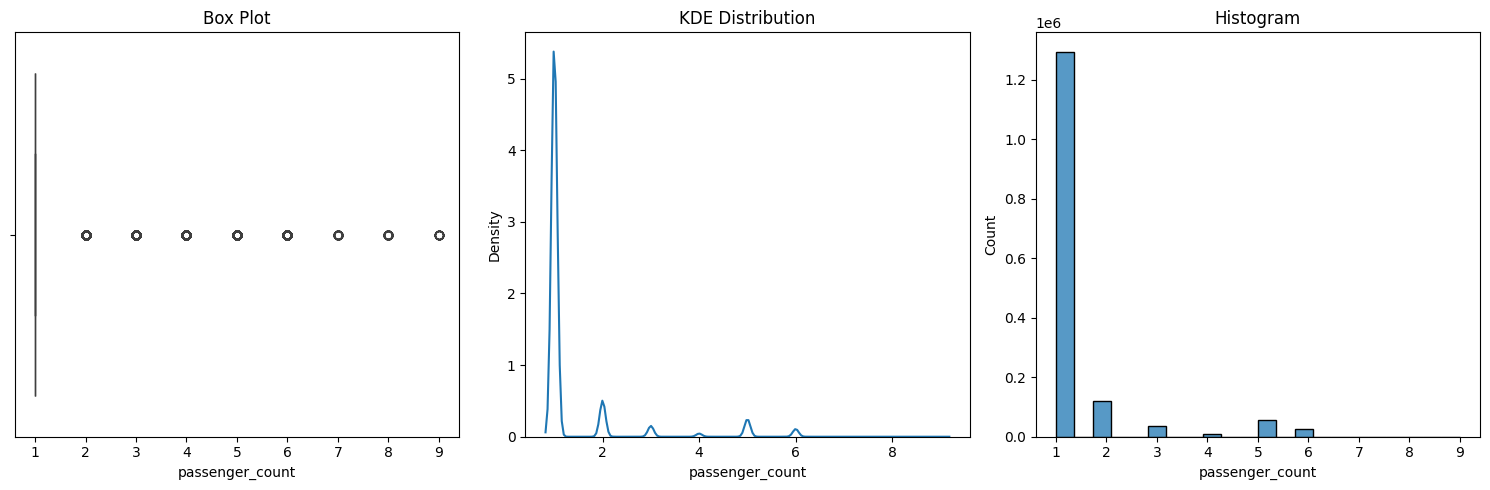

In [88]:
plot_distribution(df, 'passenger_count')

- Passenger count is categorical data, and in categorical data we don't have the concept of outliers.
- We already handled a noisy records for the passenger count above, We also know that the limit of passengers allowed by law in USA is 6 passengers.
- BUT we still have some records with passenger count > 6.
- My solution in this situation is replacing all the passenger count records > 6, with the median or the mode (they are the same in our case because the trips with passenger count 1 is maximum frequency).
- Because the passenger count value when greater than 6 is not allowed by law so it shouldn't happen and the taxi driver will refuse the trip itself in that case.

In [89]:
df.loc[df.passenger_count > 6, 'passenger_count'] = df.passenger_count.mode()[0]

In [90]:
df.passenger_count.skew()

3.131894926308647

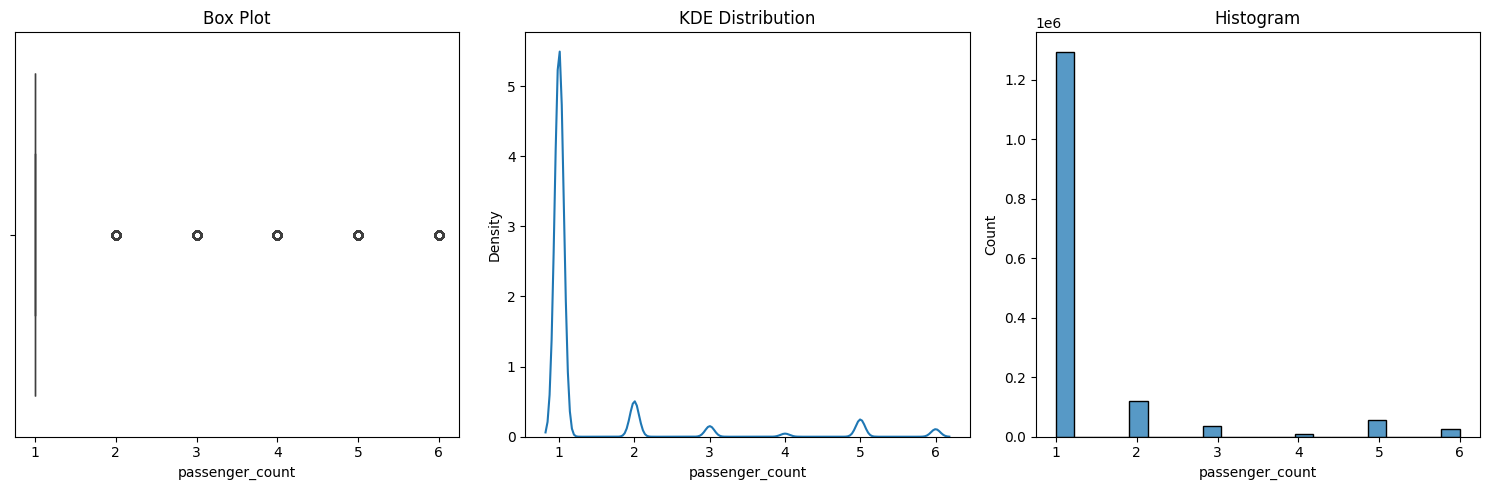

In [91]:
plot_distribution(df, 'passenger_count')

- Now these are the distributions of the passenger count after removing the non logical records of it.
- It has the same distribution as the previous one but with no records greater than 6 here and with slightly better skewness because these records are changed to 1 so the mean started shifting little bit to the left.

### 2 - Trip Distance

- First thing, Let's agree on one point, that NYC has maximum of 35 miles to move through, to go from any point in NYC to any other point is within max 35 miles.
- Check : https://lovethemaldives.com/faq/what-is-the-longest-distance-between-subway-stations-in-nyc#:~:text=What%20is%20the%20longest%20distance%20across%20NYC%3F,southwest%2C%20is%20about%2035%20miles
- We even added more margin in case the trip has took a wrong turn and ended up in highway and then returned back in that case.
- So any trip in our data set should be less than or equal to 50 miles, taking into consideration if a mistake and wrong route is taken adn making into consideration trips that goes outside NYC city as well to (Nassau or Westchwester).

- So
- (1) Firstly, i will add an upper cap for the trip_distance in my dataset to be 50 miles, and any trip more than 50 will be replaced with this upper cap.
  

In [92]:
df.trip_distance.skew()

4.0771289872054215

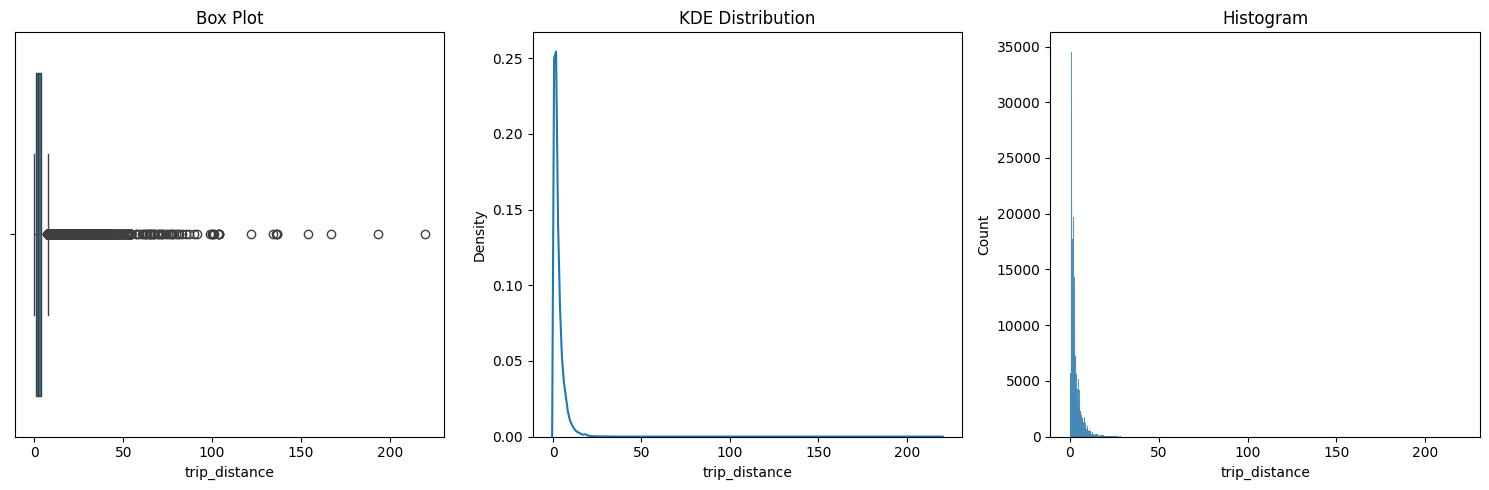

In [93]:
plot_distribution(df, 'trip_distance')

- Here we have lot of outliers and right skewness in the distance distribution.
- We have records that are outside the logical range(> 50) and the 50 upper cap that i mentioned is very relaxed as well to accomodate all trips that are going outside NYC.
- These values are wrong values and captured incoorectly by the taximeter, that needs to be clipped.

In [94]:
df.trip_distance = df.trip_distance.where(df.trip_distance < 50, 50)

In [95]:
df.trip_distance.skew()

2.959979944607141

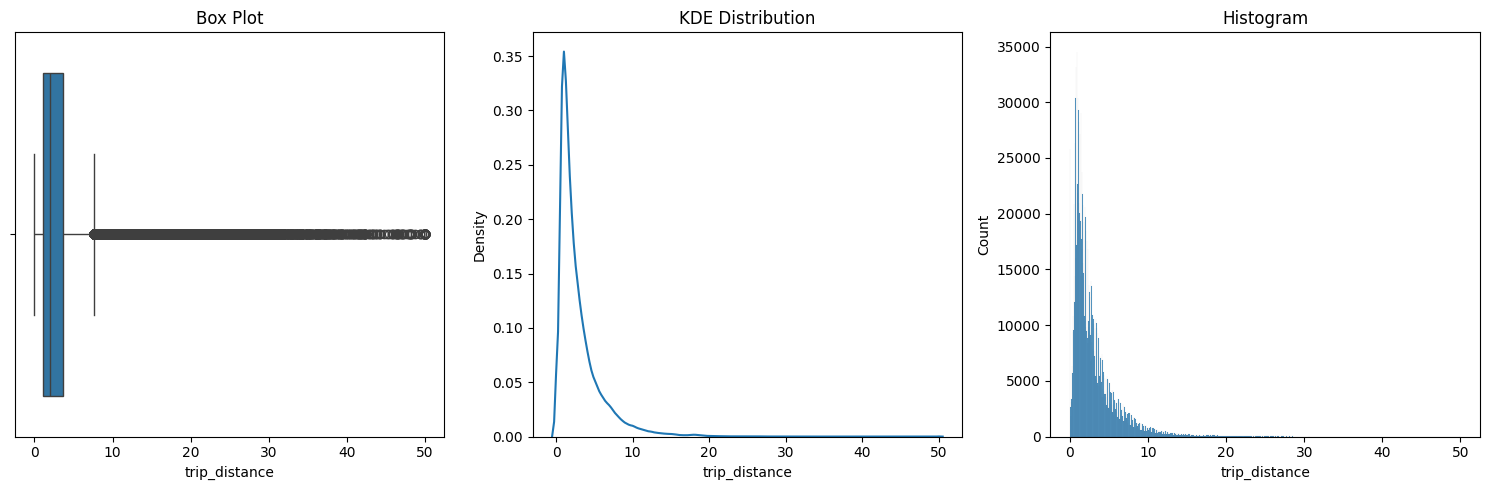

In [96]:
plot_distribution(df, 'trip_distance')

- Here we have better distribution for the distance after applying the upper bound of 50 miles.
- But we still can do better for the trip distance.
- The outlier detection method here is the IQR, because we have a lot of skewness here and the zscore won't be very reliable in that case.

In [97]:
def fix_distance_outliers(df, column):
    [lower_bound, upper_bound] = interquantile_test(df, column)

    outlier_flag = (df[column] < lower_bound) | (df[column] > upper_bound)

    mean_distance = df.groupby(['pu_location', 'do_location'])[column].transform('mean').round(1)

    df[column] = df[column].where(~outlier_flag, mean_distance)

fix_distance_outliers(df, 'trip_distance')


- I think the best way that hopefully will adjust and remove some outliers, and at the same time keep records with logical data and real scenarios is to group by the end points of the trip.
- For each group of the same two end points if the record is an outlier then i will replace it with the average distance of all trips between these two end points.
- Because most probably trips between the same two end points are going to have approximately near distance, some little variations could arise for different routing but these variations shouldn't be that problem.

In [98]:
df.trip_distance.skew()

2.5348416856470406

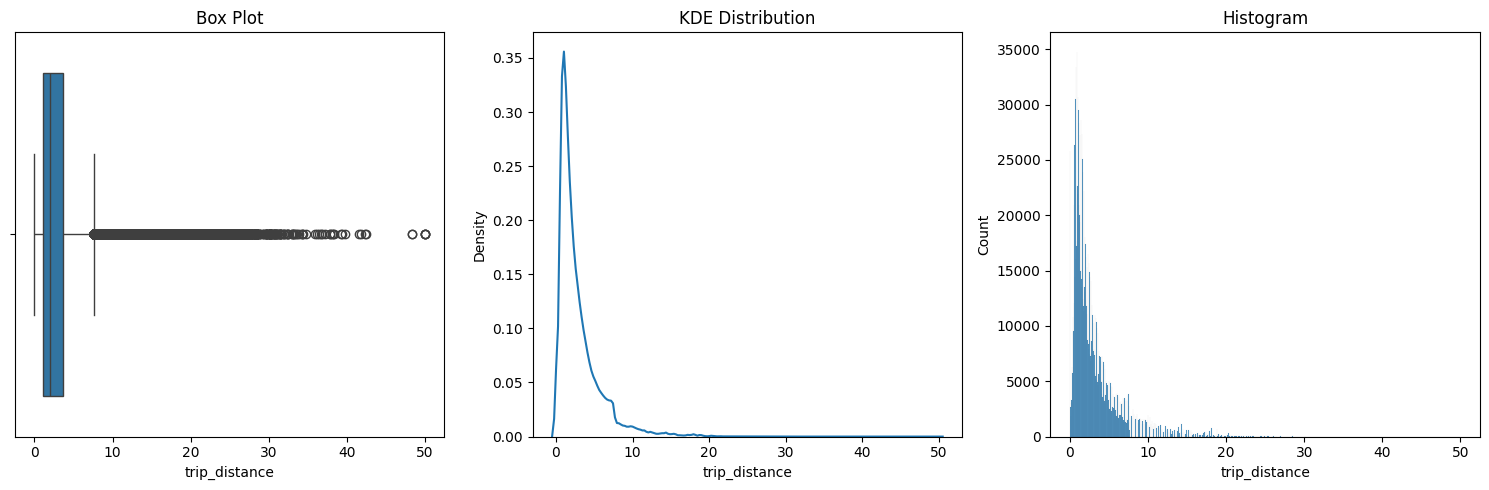

In [99]:
plot_distribution(df, 'trip_distance')

- As it can be seen, there is slightly improvement in the distribution of the trip distance, it is much better that the original graphs.
- We can now see that trip distances with range 0 -> 5 miles are the most frequent trips, only few trips are of very long distance that are most probably outside NYC city.

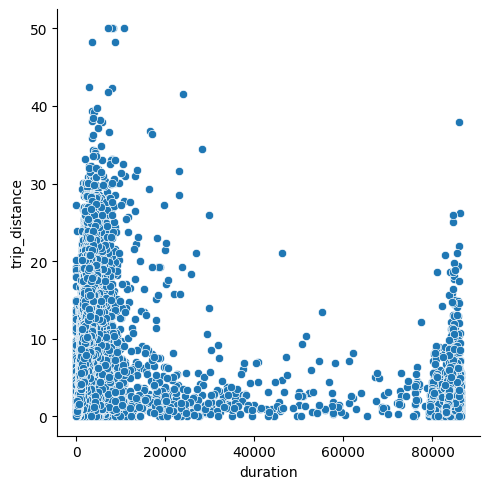

In [100]:
sns.relplot(data=df, x="duration", y="trip_distance", kind="scatter")

- In our weird phenomnen, we now have handled some problems related to the trip distance.
- But as it can be seen we still have more problems yet in the duration.

### 3 - Trip Duration

In [101]:
df.duration.skew()

30.12976685801902

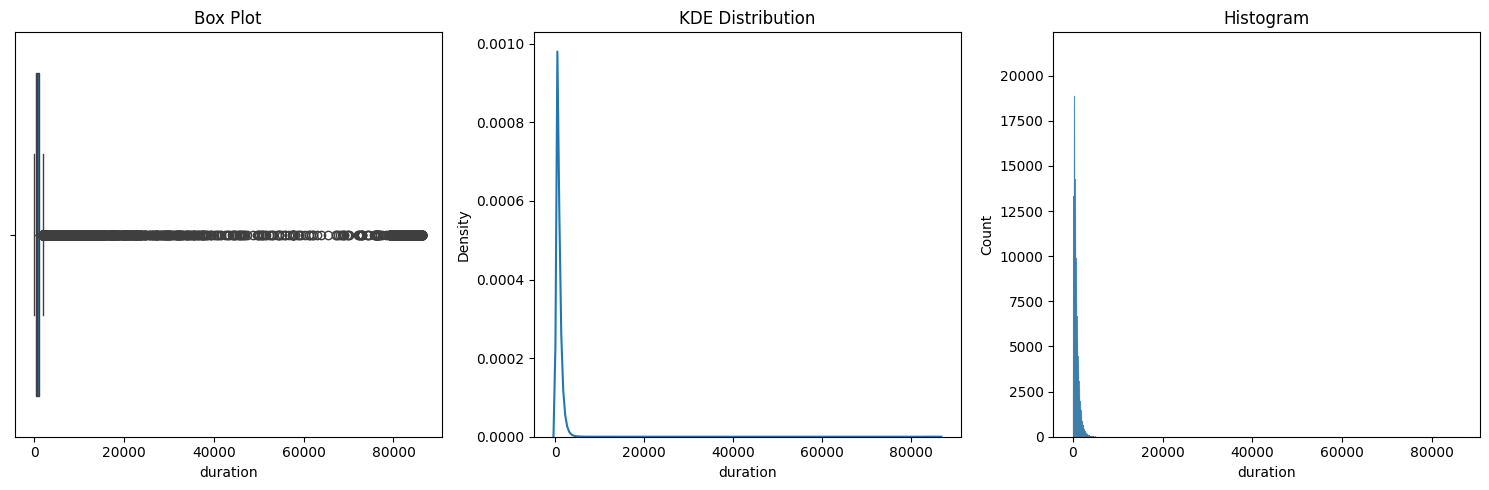

In [102]:
plot_distribution(df, 'duration')

- We can see that the trip duration is highly varied, with very high skewness to the right.
- Most of the trips lie in the range of less than 1 hour, we have very small number of trips > 5 hours.
- We want to try to understand more why these trips are so varied and different here.

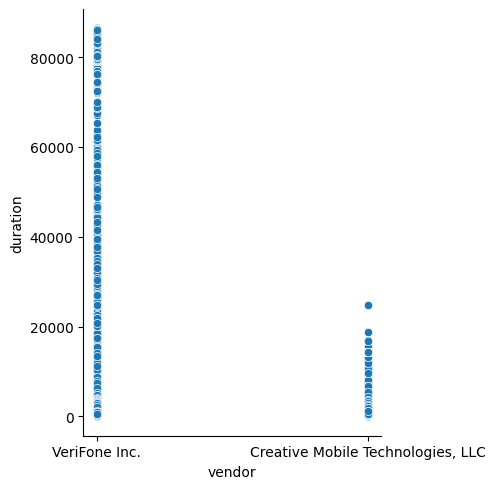

In [103]:
sns.relplot(data=df, x="vendor", y="duration", kind="scatter")

- We can see one vendor here is allowing caps and trips of longer duration and mosst probably to outside NYC.
- This is a red flag that the taximeter manfuctured by this vendor is more chance for having wrong records and calculations(22 hours taxi trip is very weird it is not even 5 hrs range).

In [104]:
df.duration.describe()

count    1.541671e+06
mean     8.533833e+02
std      2.536263e+03
min      0.000000e+00
25%      3.650000e+02
50%      6.110000e+02
75%      1.004000e+03
max      8.639300e+04
Name: duration, dtype: float64

- Maximum trip duration is around 22 hours, and minimumm trip duration is 0 seconds.
- Trip durations with 0 seconds are mostly a data entry error, or cancelled trips, we are not interested in.
- So i will add a minimum limit for a trip to be at least 1 minute.
- For the long trips, the average speed limit is 11 mph, and we have the maximum distance is 50 miles now.
- So, the longest trip now could be only 15000 seconds ~ 4 hrs.

In [105]:
df.loc[df.duration < 60, 'duration'] = 60
df.loc[df.duration > 15000, 'duration'] = 15000

In [106]:
df.duration.skew()

7.919041379389969

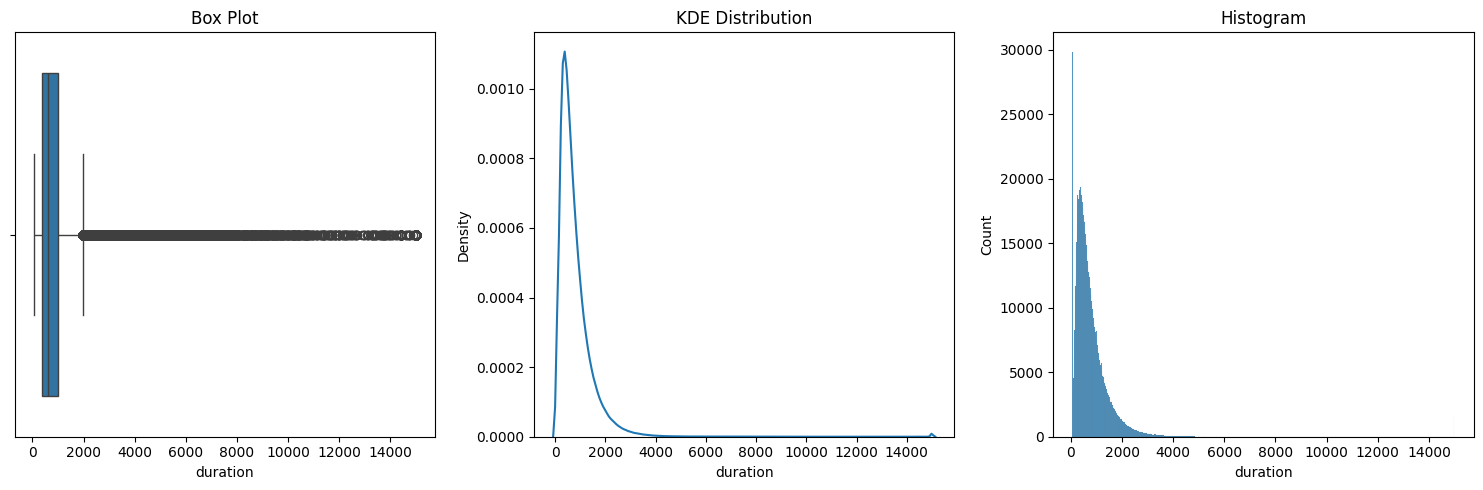

In [107]:
plot_distribution(df, 'duration')

- Now, we can notice that are still outliers here in our data.
- So i will start dealing with these outliers exactly the same way dealt with the distance.
- Because most probably the average time between two end points should be nearly the same for most of the trips between these two end points.

In [108]:
fix_distance_outliers(df, 'duration')

In [109]:
df.duration.skew()

1.9520237232690782

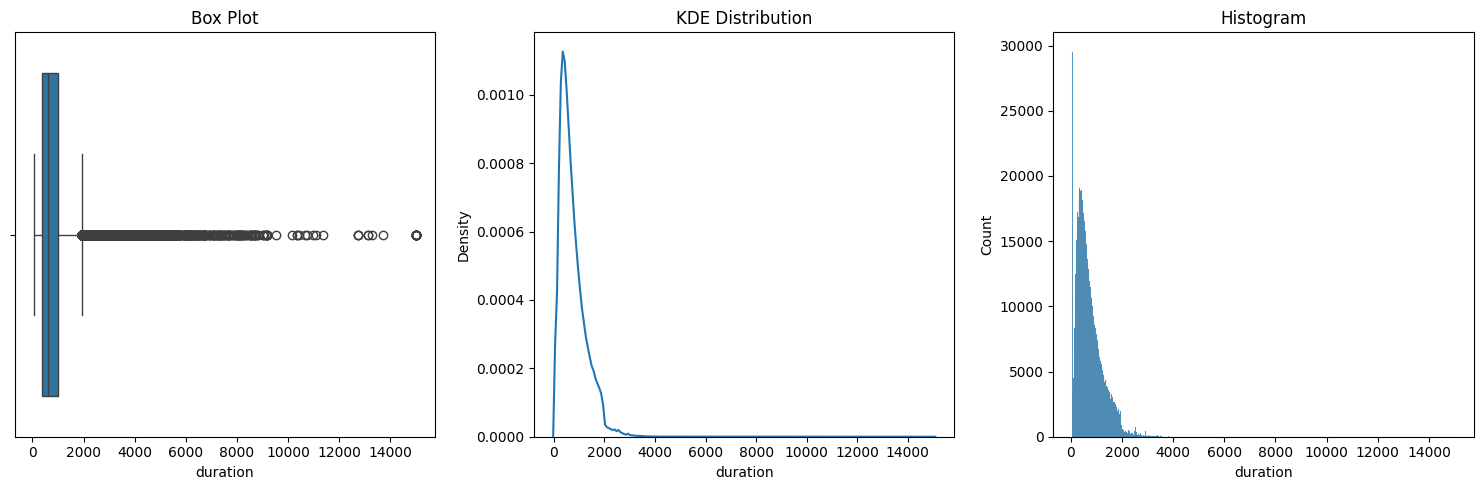

In [110]:
plot_distribution(df, 'duration')

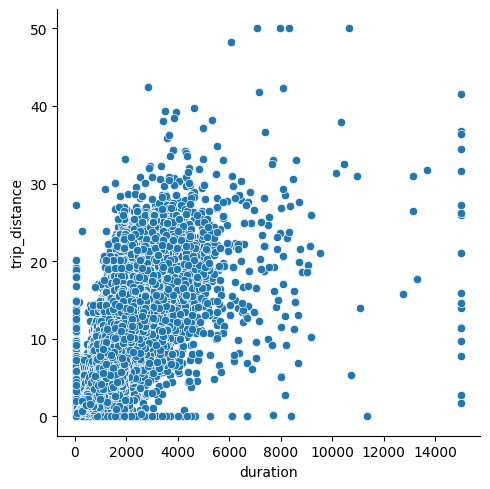

In [111]:
sns.relplot(data=df, x="duration", y="trip_distance", kind="scatter")

- We now can see much improvements done here, we now have more logical relations between the trip duration and trip distance here.
- Yes we still have some multivariate outliers, in records that have still inverse proportion between the duration adn distance that can be handled seperatly by clustering or any other technique.
- These records, my guess for them are trips such that the customer rides the taxi and tells him about the destination and taximeter provides an estimation for the distance of the trip and estimation for the cost and then the customer in that case cancels the trip.

In [112]:
def handle_duration_date_consistency(row):

    # Add the specified duration in seconds
    new_datetime = row.pickup_datetime + timedelta(seconds=float(row.duration))

    return new_datetime

df.dropoff_datetime = df.apply(handle_duration_date_consistency, axis = 1)

- Updating the duration in the records, will make inconsistencies in the dropoff datetime in that case.
- Hence i update all the records with the new dropiff_datetime which will be dropoff = pickup + duration

### 4- Fare amount

In [113]:
df.fare_amount.describe()

count    1.541671e+06
mean     1.248321e+01
std      1.036659e+01
min      0.000000e+00
25%      6.500000e+00
50%      9.500000e+00
75%      1.500000e+01
max      9.610000e+02
Name: fare_amount, dtype: float64

In [114]:
df.fare_amount.skew()

8.12815015575467

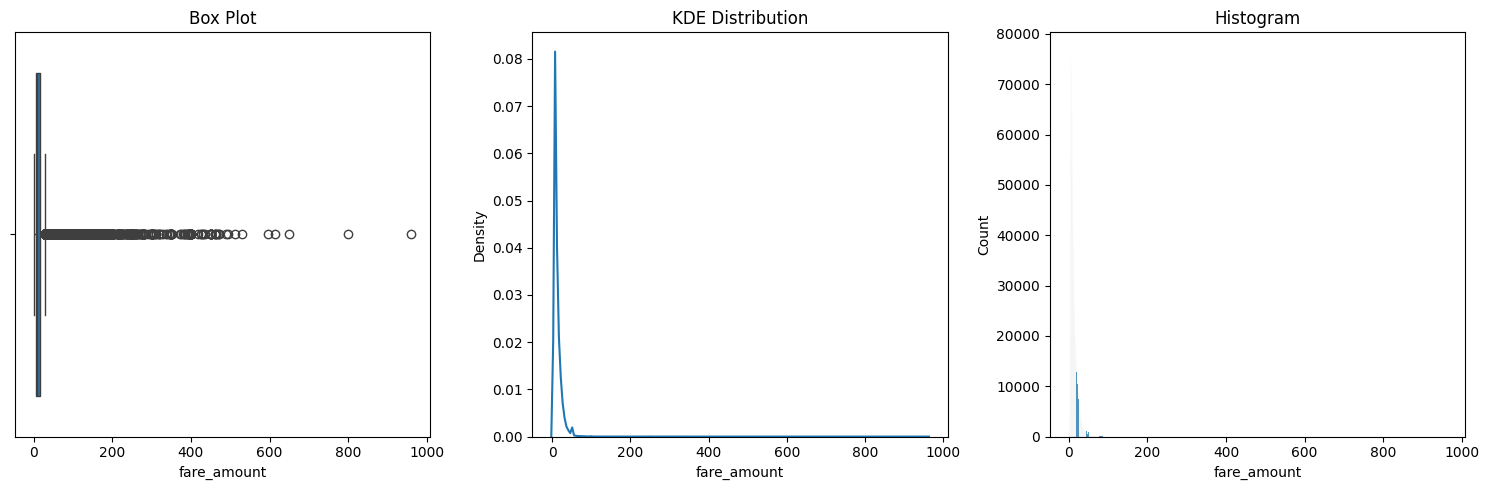

In [115]:
plot_distribution(df, 'fare_amount')

- Min : 0    May happen in trips that doesn't start and the passenger cancel it
- Max : 961  This one is extraodrinary 
- The estimated maximum fare that could happen is (3 x 35) + (0.2 x 50 x 0.7) + (6 x 15)  = 202
- This calculation is using a base fare 3 USD for 1 mile, 70 cents for 1/5 mile that is driving more than 12mph velocity inside NYC, and in the worst case a trip would take the longest distance which is 50 (35 of them is inside NYC the longest distance in NYC, and 15 miles are outside that are metered with the double base fare) having an estimated max trip fare with 202 dollars.
- Most probably these values are measured incorrectly and they are wrong values not real ones.
- So for sure we have many outliers and right skewness here in our dataset.

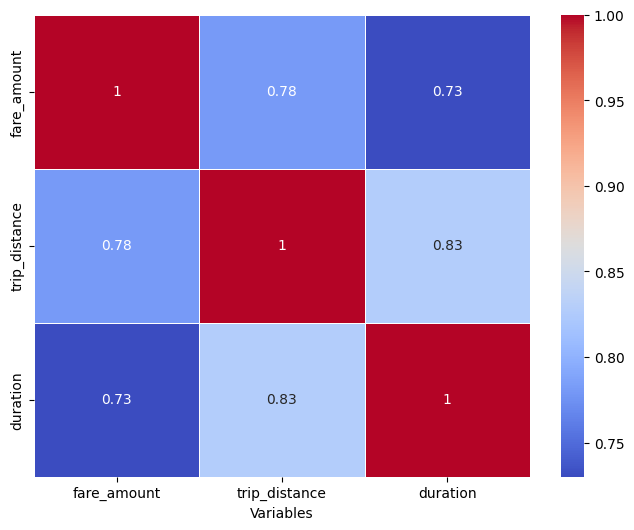

In [116]:
draw_correlation_map(df, ['fare_amount', 'trip_distance', 'duration'])

- We can see there is a strong correlation between the fare amount and the duration and the trip distance (logical it is main factors that the fare is calculated based on).
- It will be very hard to start grouping by the distance and duration and notice the average fare amount because both the trip_dsitance and duration are continous numeriv values.
- So another approach is to impute the outliers in the fare amiunt using Linear regression.
- The Linear Regression will depend on 
    - trip_distance
    - duration
    - rate type (because trips outside newyork has different base amount and other different rate types as well.)
    
- But the problem now is we don't have the rate_type attribute encoded it is still string categorical attribute then we need to encode it first.

##### Rate type Encoding

- The chosen technique is One hot encoding.
- We will face here a tradeoff
    - More columns
        - One hot encoding will add more columns to the dataset and make it larger in size 
    - Accuracy
        - Iam using the rate type after encoding into a Linear regression model that will impute the fare amount based on rate type, distance and duration.
        - We have some rate types that are negotiated so sometimes they maybe less than standard or maybe more, so we don't have a numeric fixed ordering for the rate type categories in our dataset (Negotiated fare?, Group ride also based on the driver, Outside NYC trips may have range of base amount based on the driver as well), So we have no fixed importance relation between them.
        - So we don't need our model to draw wrong relationships because of the label encoding and the ordering in the numeric data that the label encoding adds to the column.
- I will do the one hot encoding and after that i will change it to label for this column, as the data is going to be in a warehouse and need to be as efficient in space as possible.

In [117]:
def one_hot_encode(df, variable):
    for label in df[variable].unique():
        df[variable + '_' + format_column_name(label)] = np.where(
            df[variable] == label, 1, 0) 
        
def drop_one_hot_encode(df, variable):
    for label in df[variable].unique():
        df.drop(variable + '_' + format_column_name(label), axis = 1, inplace=True)


In [118]:
one_hot_encode(df, 'rate_type')

In [119]:
def handle_fare_amount_outlier(df):
    [lower_bound, upper_bound] = interquantile_test(df, 'fare_amount')

    is_outlier = (df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)

    non_outlier_data = df[~is_outlier]
    outlier_data = df[is_outlier]
    rate_type_attributes = [col for col in df.columns if col.startswith('rate_type_')]

    x = ['trip_distance', 'duration'] + rate_type_attributes

    model = LinearRegression()
    model.fit(non_outlier_data[x], non_outlier_data['fare_amount'])

    
    predicted_fares = model.predict(outlier_data[x])

    df.loc[is_outlier, 'fare_amount'] = predicted_fares

    return df


In [120]:
one_hot_encode(df, 'rate_type')
handle_fare_amount_outlier(df)

,vendor,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,duration,velocity,negative_money,rate_type_standard_rate,rate_type_negotiated_fare,rate_type_jfk,rate_type_nassau_or_westchester,rate_type_newark,rate_type_group_ride,rate_type_unknown
0,VeriFone Inc.,2015-07-01 00:12:55,2015-07-01 00:16:53,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bushwick South",1.0,0.88,5.0,...,238.0,0.003697,False,1,0,0,0,0,0,0
1,VeriFone Inc.,2015-07-01 00:38:35,2015-07-01 00:49:22,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Queens,Ridgewood",1.0,3.00,11.0,...,647.0,0.004637,False,1,0,0,0,0,0,0
2,VeriFone Inc.,2015-07-01 00:59:01,2015-07-01 01:04:10,N,Standard rate,"Brooklyn,Bushwick North","Brooklyn,East Williamsburg",1.0,1.61,6.5,...,309.0,0.005210,False,1,0,0,0,0,0,0
3,VeriFone Inc.,2015-07-01 00:48:41,2015-07-01 00:54:24,N,Standard rate,"Brooklyn,Brownsville","Brooklyn,East Flatbush/Remsen Village",1.0,0.00,5.0,...,343.0,0.000000,False,1,0,0,0,0,0,0
4,VeriFone Inc.,2015-07-01 00:56:28,2015-07-01 01:07:45,N,Standard rate,"Brooklyn,East Flatbush/Remsen Village","Brooklyn,Brownsville",1.0,0.00,8.0,...,677.0,0.000000,False,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541666,VeriFone Inc.,2015-07-31 23:02:54,2015-07-31 23:07:22,N,Standard rate,"Manhattan,Central Harlem","Manhattan,Central Harlem North",1.0,0.73,5.0,...,268.0,0.002724,False,1,0,0,0,0,0,0
1541667,VeriFone Inc.,2015-07-31 23:09:17,2015-07-31 23:16:45,N,Standard rate,"Manhattan,Central Harlem North","Manhattan,Bloomingdale",1.0,1.50,7.5,...,448.0,0.003348,False,1,0,0,0,0,0,0
1541668,VeriFone Inc.,2015-07-31 23:24:43,2015-07-31 23:39:53,N,Standard rate,"Manhattan,Central Harlem","Manhattan,Midtown East",1.0,4.03,14.5,...,910.0,0.004429,False,1,0,0,0,0,0,0
1541669,VeriFone Inc.,2015-07-31 23:59:30,2015-08-01 00:16:17,N,Standard rate,"Brooklyn,Greenpoint","Queens,Astoria",1.0,4.20,15.5,...,1007.0,0.004171,False,1,0,0,0,0,0,0


In [121]:
df.fare_amount.skew()

2.008895177583459

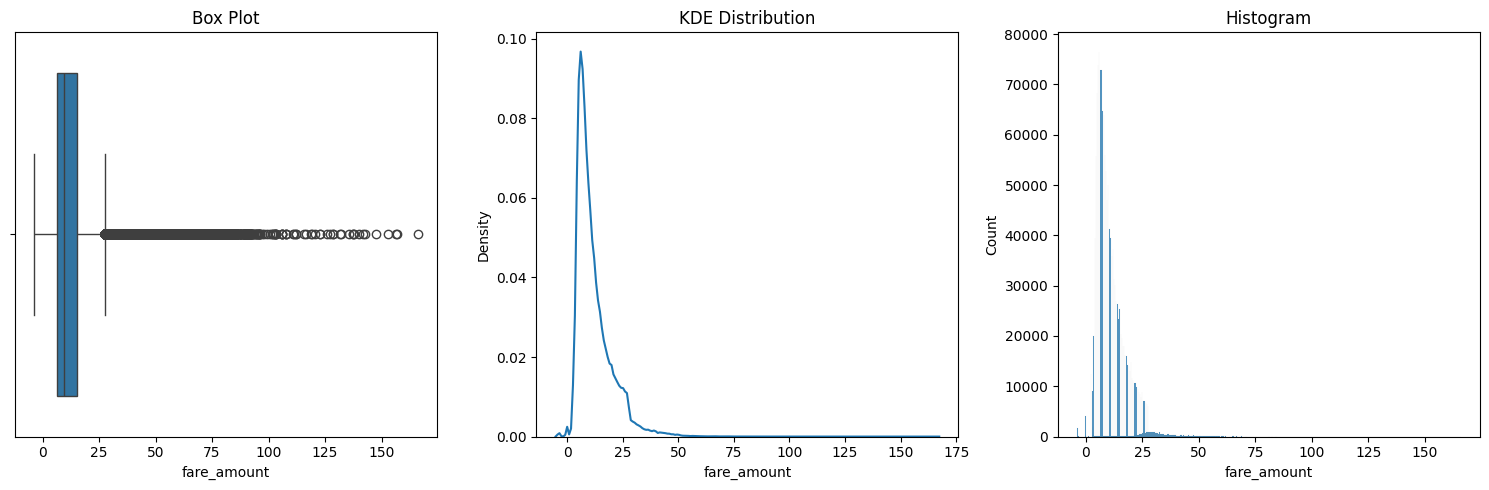

In [122]:
plot_distribution(df, 'fare_amount')

In [123]:
df.fare_amount.describe()

count    1.541671e+06
mean     1.189443e+01
std      7.972612e+00
min     -3.815794e+00
25%      6.500000e+00
50%      9.500000e+00
75%      1.500000e+01
max      1.659818e+02
Name: fare_amount, dtype: float64

In [124]:
drop_one_hot_encode(df, 'rate_type')

- Now for the new fare amount data:
    - Min : -3.8 (some of the imputed values are back to negative from the LinReg so we need to handle these values back again)
    - Max : 165 much more logical value
    - Skewness : 2.008 much better than before and the graphs itself started to have some very tiny Guassian normal shape xD.
    - The graphs still have lot of outliers specially the box plot
        - Because my dataset is 1M 500K, most of them has fare amount of average as most of them are just small short trips, so having some even if little frequency in some expensive trips it will mess with the outliers and the skewness of the values.

In [125]:
handle_negative_money(df)

df.fare_amount.describe()

count    1.541671e+06
mean     1.190414e+01
std      7.958106e+00
min      0.000000e+00
25%      6.500000e+00
50%      9.500000e+00
75%      1.500000e+01
max      1.659818e+02
Name: fare_amount, dtype: float64

### 5- Extra

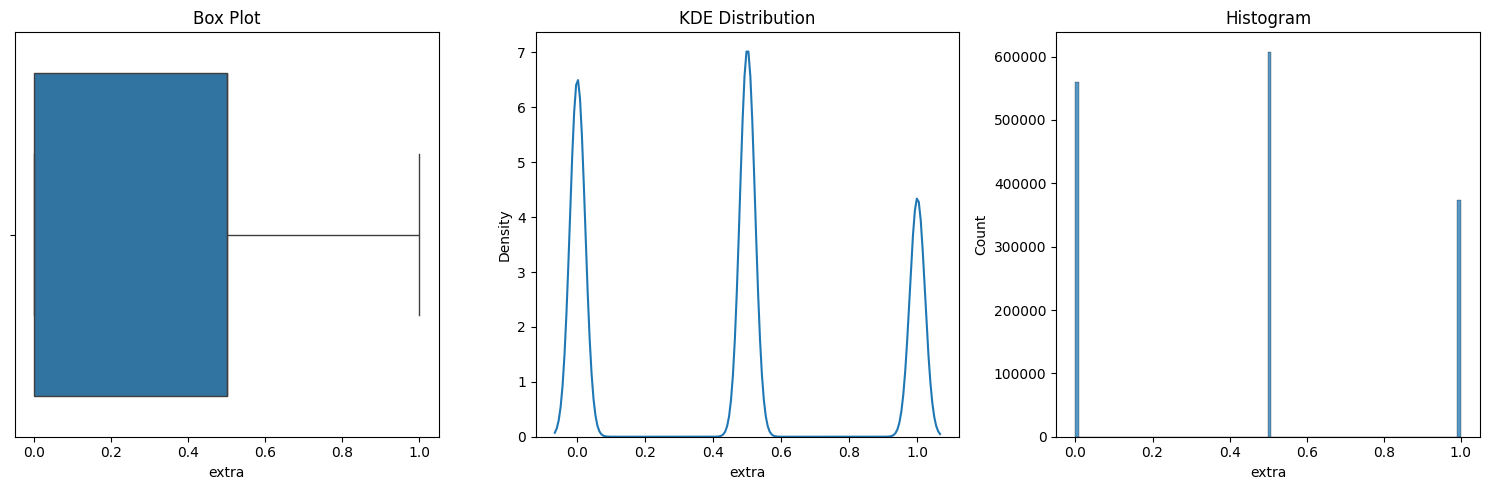

In [126]:
plot_distribution(df, 'extra')

In [127]:
df.extra.skew()

0.20917658194384772

- The extra field is normalized, it only has 3 distnict values so the data is normalized by itself because of the imputation method used when handling the missing data.

### 6- MTA Tax

In [128]:
df.mta_tax.describe()

count    1.541671e+06
mean     4.874117e-01
std      9.634959e-02
min      0.000000e+00
25%      5.000000e-01
50%      5.000000e-01
75%      5.000000e-01
max      4.950000e+01
Name: mta_tax, dtype: float64

In [129]:
df.mta_tax.value_counts()

mta_tax
0.5     1502653
0.0       39013
1.0           3
49.5          2
Name: count, dtype: int64

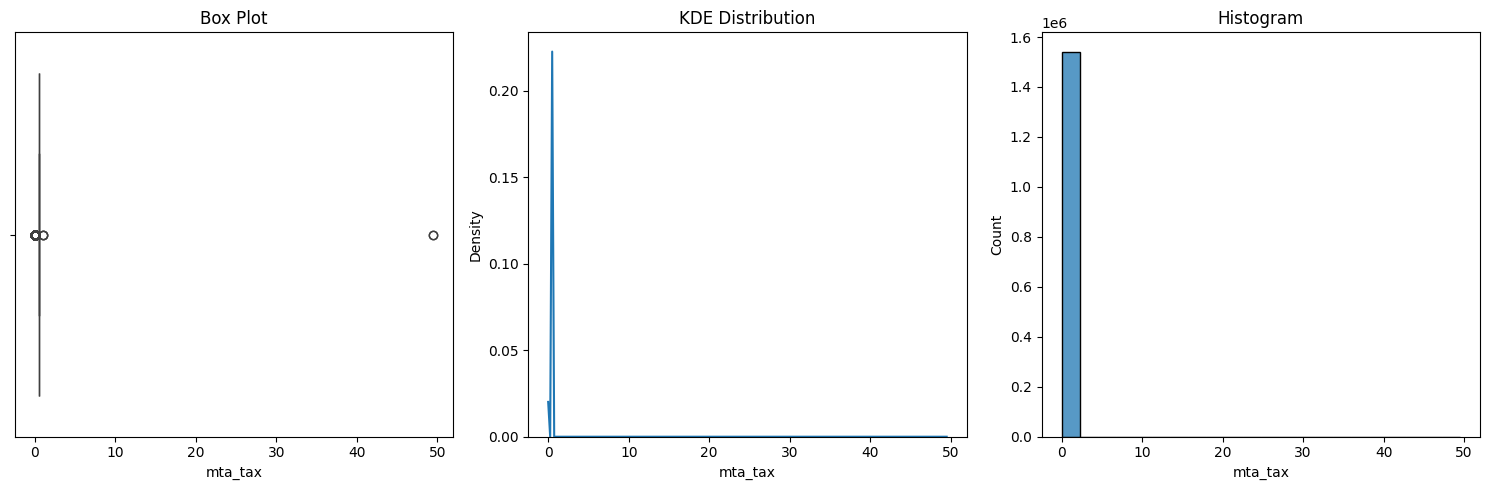

In [130]:
plot_distribution(df, 'mta_tax')

- Having a look on the mta_tax, we have values of 1 and 49.5 both of these values are erros.
- the mta_tax according to the dataset_description it is always 0.5 if it is added and it is added or not based on the metered rate (rate_type) used.
- I will replace all these errors in that case with 0.5.

In [131]:
df[(df.mta_tax != 0) & (df.mta_tax != 0.5)].mta_tax = 0.5

C:\Users\admin\AppData\Local\Temp\ipykernel_12308\1004492902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df.mta_tax != 0) & (df.mta_tax != 0.5)].mta_tax = 0.5


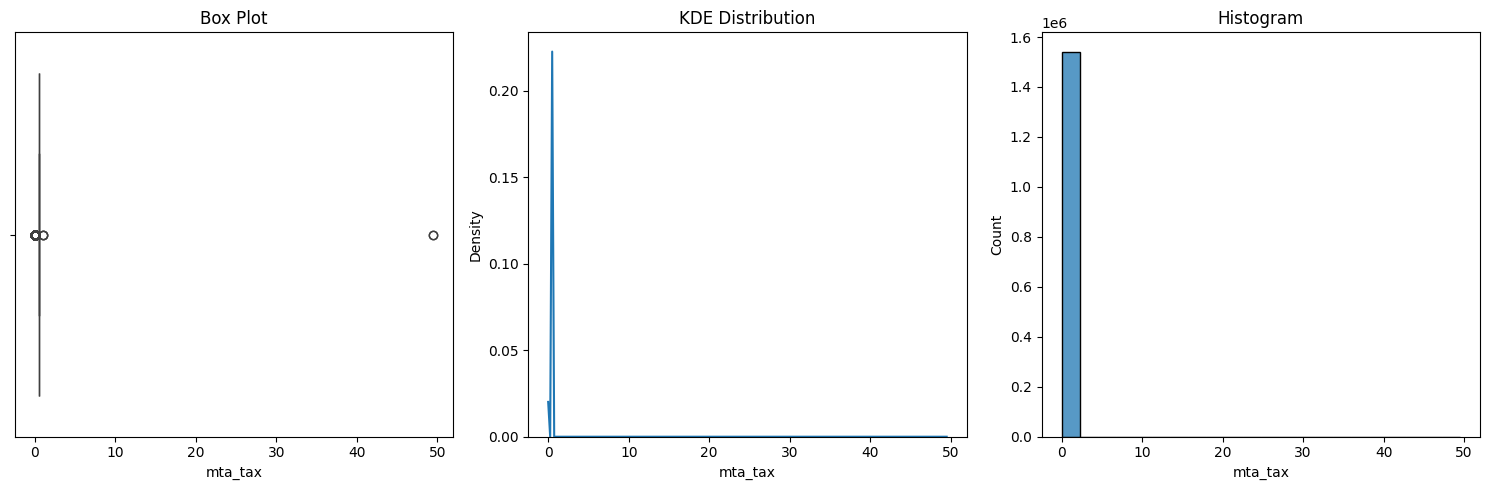

In [132]:
plot_distribution(df, 'mta_tax')

- After handling the data, now the minority of the data is the records with mta tax is 0 and it is based on the metered rate used.
- There were only few records (~5) was non zero and non 0.5, that were changed to 0.5, so we can't expect any change in the the skewness value excpet the sign, it is just changed from right skew to left skew nothing else because we removed the records with mta_tax =1 and 49.5, so what remained is the majority at 0.5, and only few records at 0 which introduced a left skewness here and flipped the distribution.

### 7- Tip amount

In [133]:
df.tip_amount.describe()

count    1.541671e+06
mean     1.204619e+00
std      2.749529e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      4.880000e+02
Name: tip_amount, dtype: float64

In [134]:
df.tip_amount.skew()

25.990692789039475

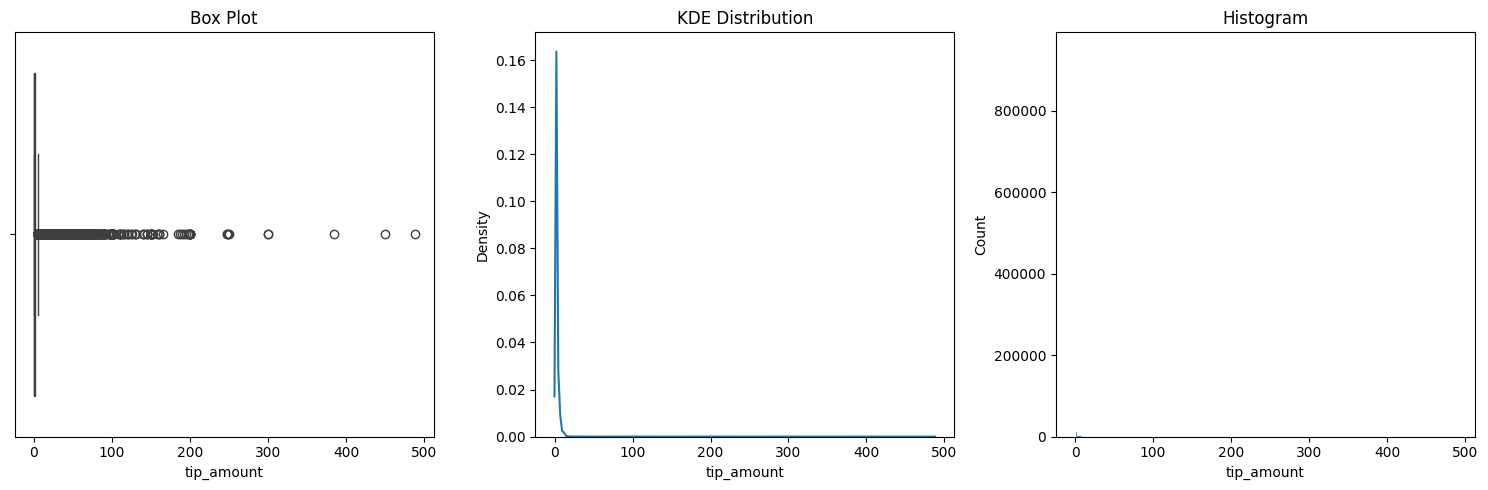

In [135]:
plot_distribution(df, 'tip_amount')

- Min : 0 (logical alles gut)
- Max : 488USD (Here stop, I wish  i was a NYC taxi driver), this value i see it as a noise value not even an outlier.
    - I don't think that some one will pay a tip amount more than the fare amount.
- Skewness : 26, high right skewed data because the noisy values that are found in the dataset.

- Hence i will replace all tip amounts > their corresponding fare amount with the fare amount and if it is not greater i will leave it as it is.

In [136]:
df.loc[df['tip_amount'] > df['fare_amount'], 'tip_amount'] = df['fare_amount']

In [137]:
df.tip_amount.describe(), df.tip_amount.skew()

(count    1.541671e+06
 mean     1.158787e+00
 std      2.034879e+00
 min      0.000000e+00
 25%      0.000000e+00
 50%      0.000000e+00
 75%      2.000000e+00
 max      1.000000e+02
 Name: tip_amount, dtype: float64,
 3.7486544510207764)

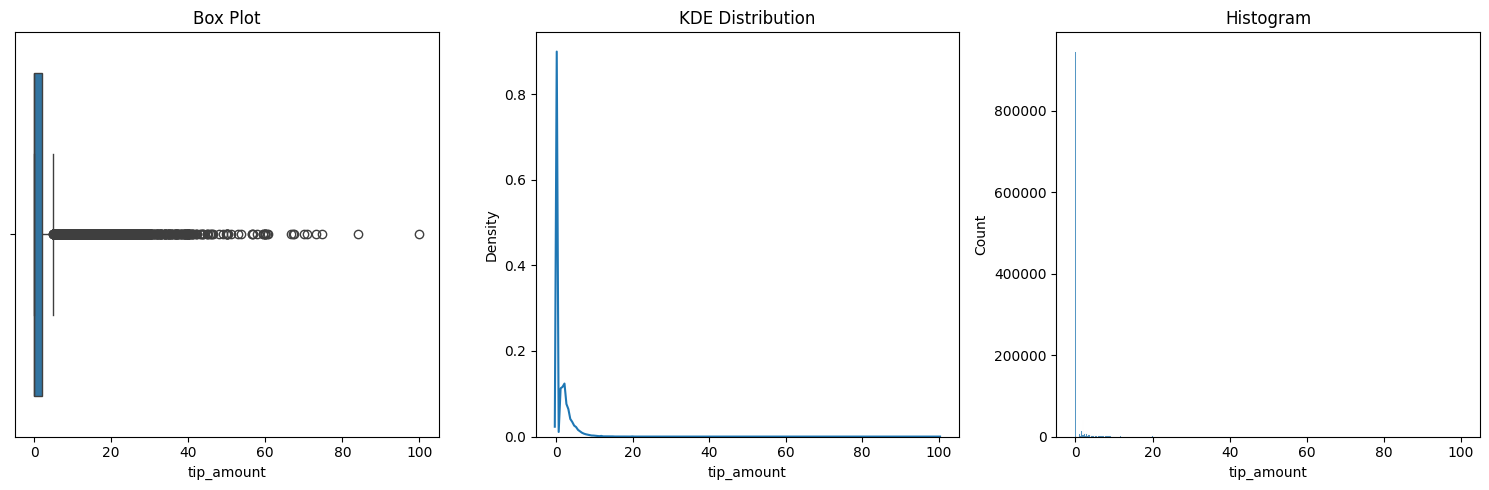

In [138]:
plot_distribution(df, 'tip_amount')

- This is the Distribution after clipping the tip amount with the fare amount.
- It is still sus, we need to have a look on records of high tip amount.

In [139]:
df[df.tip_amount > 50][money_columns + ['trip_distance', 'duration', 'pu_location', 'do_location']]

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_distance,duration,pu_location,do_location
19452,122.921891,0.0,0.5,100.000000,0.00,0.3,31.0,10981.0,"Queens,Hammels/Arverne","Manhattan,Washington Heights South"
30929,60.371177,1.0,0.5,60.371177,5.54,0.3,20.1,3685.5,"Brooklyn,Crown Heights North","Unknown,Unknown"
61961,60.824113,0.0,0.0,59.500000,0.00,0.0,20.1,3685.5,"Brooklyn,Crown Heights North","Unknown,Unknown"
78173,67.179374,1.0,0.0,67.179374,11.75,0.0,25.3,3162.0,"Queens,Astoria","EWR,Newark Airport"
174958,152.658874,0.0,0.5,84.110000,2.08,0.3,34.4,15000.0,"Queens,South Jamaica","Queens,Far Rockaway"
329424,50.195599,1.0,0.5,50.195599,0.00,0.3,17.6,2723.3,"Queens,Sunnyside","Queens,Rosedale"
350727,105.716173,0.0,0.5,59.490000,0.00,0.3,15.8,12745.0,"Queens,Springfield Gardens North","Queens,Far Rockaway"
373529,67.578329,1.0,0.0,67.578329,11.75,0.3,17.4,2907.5,"Unknown,Unknown","Manhattan,Central Harlem North"
588607,74.617728,1.0,0.5,74.617728,5.54,0.3,23.8,4970.9,"Brooklyn,Stuyvesant Heights","Bronx,City Island"
613200,52.880289,0.5,0.5,52.880289,5.54,0.3,17.6,3181.0,"Brooklyn,Clinton Hill","Unknown,Unknown"


- My take on these records:
    - Some of the records maybe logical because the long distance covered by the trip, some of these trips really covering long distance here.
    - Secondly, all these trips are relatively long time trips with the rest of the data set, in these records we can see trips in the range of ~3 hrs.
- But the data is still highly right skewed.
- Based on my take on these records, i will be flexible in removing the outliers here, i will use the ZScore for outlier detection with 4 units of standard deviation away from the mean. (Tradeoff here between realisim and distribution)
- Iam using the Zscore although the data is still highly skewed (Not preferable to use zscore with highly skewed data) because i want flexibility here based on the records i have shown up here, and the IQR test here will be very strict with nearly anything > 5 USD being dealt as an outlier. 
- And the records being filtered in the outlier will be replaced with the mean of the whole records.
- Why am i using the mean of the whole records here?
    - Non outlier records will be of little tip amount and the mean in that case will be very samll, and i think it will not be unfair to mess with the data completely for the distribution, i need as well to keep realistic records in my data.
    - So iam using the mean of the whole data so the mean value won't be very small in that case and be more realistic.

In [140]:
def handle_tip_amount(df):
    [lower_bound, upper_bound] = zscore_test(df, 'tip_amount', 4)
    
    outlier_condition = (df.tip_amount < lower_bound) | (df.tip_amount > upper_bound)

    df.loc[outlier_condition, 'tip_amount'] = df.tip_amount.mean()


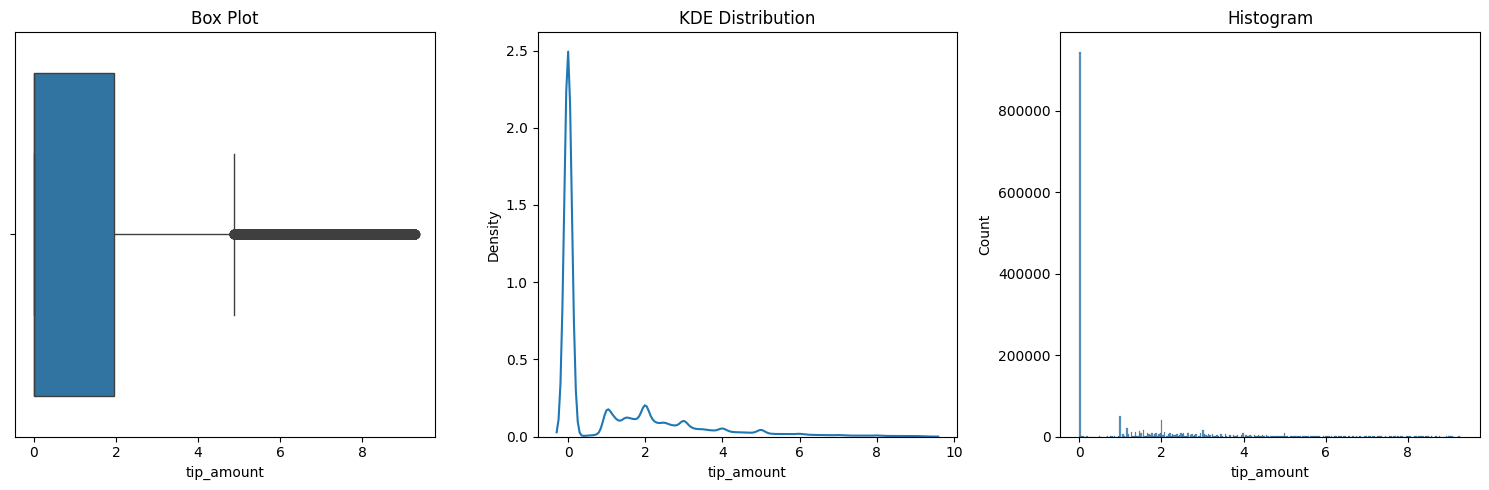

In [141]:
handle_tip_amount(df)
plot_distribution(df, 'tip_amount')

In [142]:
df.tip_amount.describe()

count    1.541671e+06
mean     1.065907e+00
std      1.695131e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.950000e+00
max      9.297399e+00
Name: tip_amount, dtype: float64

In [143]:
df.tip_amount.skew()

1.833917308134377

- Now the values are logical and good with distribution at the same time.
- We still have changed it with little bit large extent because of the outlier test, but we have better skewness here, as well as more normalized distributions.
- The box plot as well has shown good frequency in the range of the IQR, some values here are still considered as outliers after the winkers, and if we used the IQR test here these values were about to be more damaged.
- Overall, i think the changes are good enough and the column is better this way than before after removing the noises and handling outliers.

### 8- Tolls amount

In [144]:
df.tolls_amount.skew()

271.3404207160811

- OK, before even doing anything this column needs to be destroyed.

In [145]:
df.tolls_amount.describe()

count    1.541671e+06
mean     1.200463e-01
std      1.326591e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.080900e+02
Name: tolls_amount, dtype: float64

- Min: 0
- Max: 808 dollars, noisy data in here

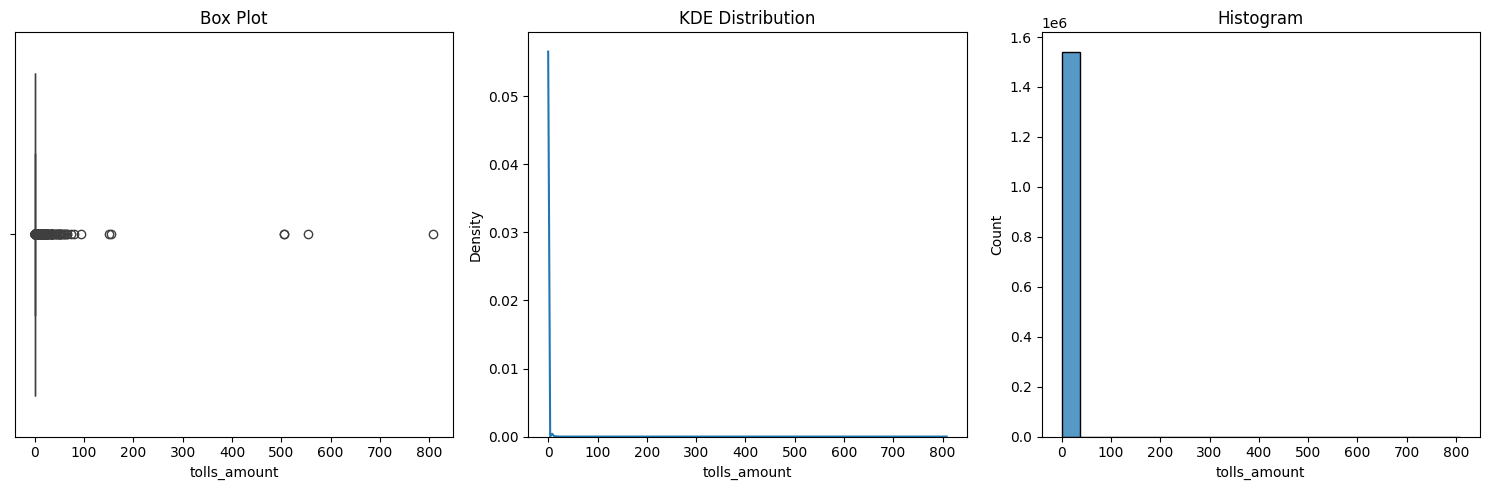

In [146]:
plot_distribution(df, 'tolls_amount')

- According to https://www.uproad.com/blog/how-much-are-tolls-in-new-york:
    - The worst possible scenario is a trip that will pass by all the tolls in NYC having maximum (impossible to pass by them all xD) 151.65
    - So i will upper cap the values with the impossible worst case scenario.
- Imputing with the mean here will remove lot of correct records in the tolls amount, here because my dataset is huge so i have relatively really more records with 0 or very small amount of tolls amount making the mean very small.
- Other option will be grouping by the pu_location and do_location and average the tolls between both enpoints as most probably the same tolls will need to be paid again.
    - Problem with this solution is we will still have very large skewness because the combination of pu_do won't cover all the cases, we will have small number of records in the combination having many outliers, in the distance case it was easier as we had much less number of outliers back then, so it was more acceptable solution.

- I will impute with the mean of the non zero values, hopefully it is little bit covering some good range in the values as well.
- Outlier detection technique i will use is the IQR, as the skewness of the data is very large and i will not be able to use the zscore here.
- The IQR test will be done also on the postive values only, the 0 values won't be included as it will remove many positive values as well.

In [147]:
df.loc[df.tolls_amount > 151.6, 'tolls_amount'] = 151.65

In [148]:
df.tolls_amount.describe()

count    1.541671e+06
mean     1.188971e-01
std      9.294685e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.516500e+02
Name: tolls_amount, dtype: float64

In [149]:
df.tolls_amount.skew()

27.08799683351359

In [150]:
def impute_with_non_zero_mean(df, column):
    [lower_bound, upper_bound] = interquantile_test(df[df[column] > 0], column)

    outlier_condition = ((df[column] < lower_bound) | (df[column] > upper_bound)) & (df[column] != 0)

    non_zero_mean = df[df[column] > 0][column].mean()

    df.loc[outlier_condition, column] = non_zero_mean
    



In [151]:
impute_with_non_zero_mean(df, 'tolls_amount')

In [152]:
df.tolls_amount.skew()

6.779385276546116

In [153]:
df.tolls_amount.describe()

count    1.541671e+06
mean     1.139074e-01
std      7.884730e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.814438e+00
Name: tolls_amount, dtype: float64

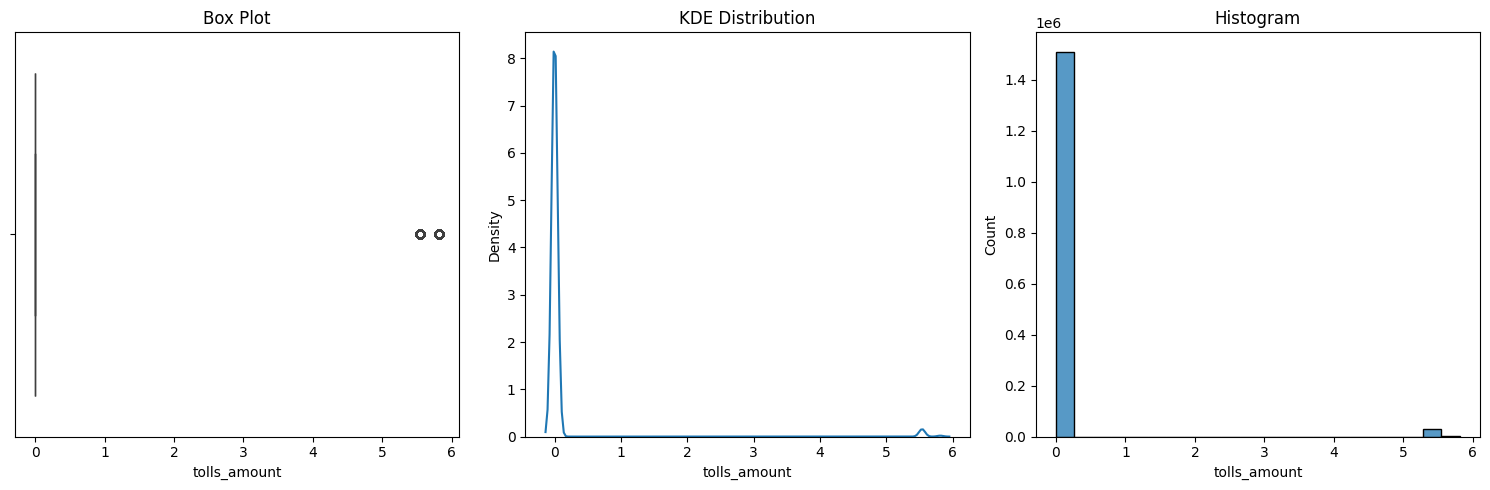

In [154]:
plot_distribution(df, 'tolls_amount')

- The tolls_amount is better than before, it still has very large skewness value (~6.8), but this because having some records with some tolls_amount, and most of the records in my dataset is 0 tolls, so this caused the large skewness here.
- The distributions itself in the graphs is little bit better.
- We now have min value : 0, max value : 5.7 and standard deviation of 0.7 (the column doesn't cover big range of data here, but this is the best i can do here from my side :(     )

### 9- Total amount

- In the above section, we handled inconsistency in the data when the sub columns of money weren't adding up to the total amount.
- After handling and dealing with the outliers in each of these columns, now these inconsistencies are back.
- So we will set the total_amount to the sum of all the sub columns of the money amounts (They were equal before handling the outliers).

In [155]:
df.total_amount = df.apply(handle_money_sum_inconsistecny, axis = 1)

In [156]:
df[money_columns + ['total_amount']].head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,5.0,0.5,0.5,1.58,0.0,0.3,7.88
1,11.0,0.5,0.5,2.46,0.0,0.3,14.76
2,6.5,0.5,0.5,0.00,0.0,0.3,7.80
3,5.0,0.5,0.5,1.26,0.0,0.3,7.56
4,8.0,0.5,0.5,1.86,0.0,0.3,11.16


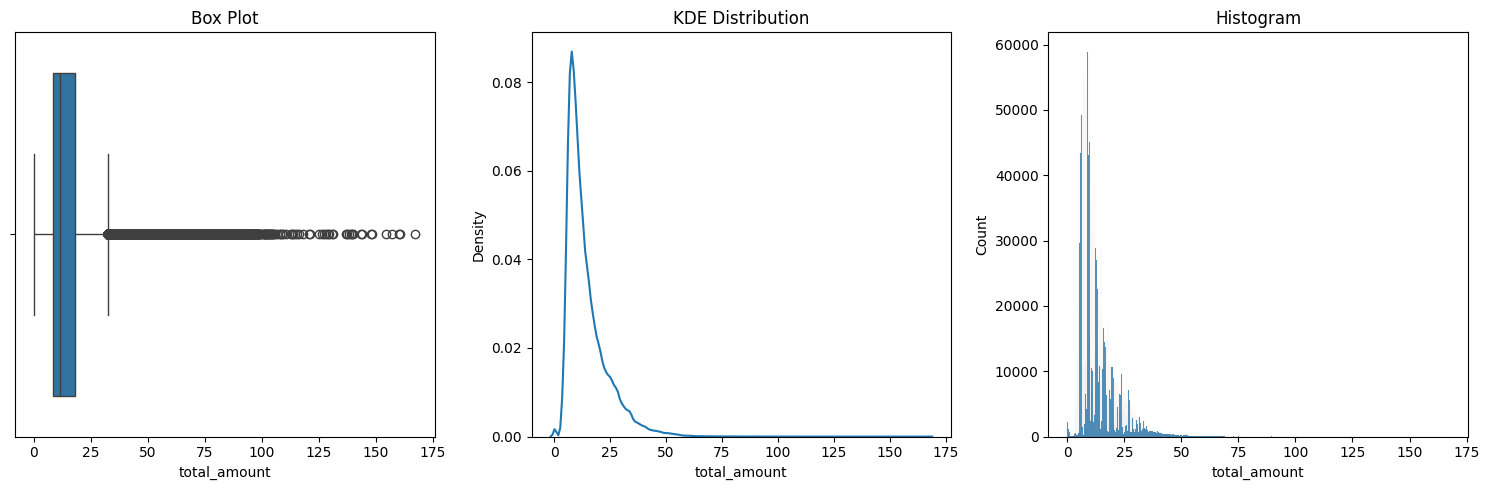

In [157]:
plot_distribution(df, 'total_amount')

In [158]:
df.total_amount.skew()

1.9043871386351865

- These are the distributions of the total amount after having all the outliers in the money columns handled, the graphs and the skew levels are not bad.
- Let's have a closer look on the outliers here and see if they are making sense or not.

In [159]:
df[df.total_amount > 100].head(10)

,vendor,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,weekday,hour,state,duration,velocity,negative_money
19452,VeriFone Inc.,2015-07-01 13:58:41,2015-07-01 17:01:42,N,Standard rate,"Queens,Hammels/Arverne","Manhattan,Washington Heights South",1.0,31.0,122.921891,...,124.88,Credit card,Street-hail,0,0,13,Queens,10981.0,0.002819,False
27389,VeriFone Inc.,2015-07-01 16:33:30,2015-07-01 20:43:30,N,Negotiated fare,"Manhattan,Washington Heights South","Queens,Springfield Gardens South",2.0,41.5,165.981800,...,167.28,Cash,Street-hail,0,0,16,Manhattan,15000.0,0.001730,False
65784,VeriFone Inc.,2015-07-02 11:26:17,2015-07-02 14:18:42,N,Negotiated fare,"Brooklyn,Marine Park/Mill Basin","Unknown,Unknown",2.0,37.9,132.151755,...,139.12,Credit card,Dispatch,0,1,11,Brooklyn,10345.0,0.014162,False
114233,VeriFone Inc.,2015-07-03 09:23:25,2015-07-03 13:33:25,N,Standard rate,"Queens,Far Rockaway","Brooklyn,Marine Park/Floyd Bennett Field",1.0,31.6,147.583384,...,154.20,Credit card,Street-hail,0,2,9,Queens,15000.0,0.001377,False
114733,VeriFone Inc.,2015-07-03 09:55:16,2015-07-03 14:05:16,N,Standard rate,"Bronx,Crotona Park East","Brooklyn,Fort Greene",1.0,15.9,119.124392,...,128.88,Credit card,Street-hail,0,2,9,Bronx,15000.0,0.000188,False
141240,VeriFone Inc.,2015-07-03 20:18:48,2015-07-03 22:21:14,N,Negotiated fare,"Manhattan,Central Harlem North","Queens,Springfield Gardens North",3.0,28.2,96.977845,...,103.02,Cash,Dispatch,0,2,20,Manhattan,7346.0,0.003840,False
163537,VeriFone Inc.,2015-07-04 03:13:31,2015-07-04 04:36:25,N,Nassau or Westchester,"Brooklyn,Manhattan Beach","Unknown,Unknown",5.0,37.2,101.773247,...,102.27,Credit card,Dispatch,0,3,3,Brooklyn,4974.0,0.007483,False
174958,VeriFone Inc.,2015-07-04 13:01:41,2015-07-04 17:11:41,N,Standard rate,"Queens,South Jamaica","Queens,Far Rockaway",1.0,34.4,152.658874,...,160.43,Credit card,Street-hail,0,3,13,Queens,15000.0,0.001221,False
310538,VeriFone Inc.,2015-07-07 11:02:19,2015-07-07 15:12:19,N,Standard rate,"Queens,Springfield Gardens South","Brooklyn,Marine Park/Floyd Bennett Field",1.0,25.9,137.251139,...,138.05,Credit card,Street-hail,0,6,11,Queens,15000.0,0.000870,False
350727,VeriFone Inc.,2015-07-08 10:22:53,2015-07-08 13:55:18,N,Standard rate,"Queens,Springfield Gardens North","Queens,Far Rockaway",1.0,15.8,105.716173,...,107.67,Credit card,Street-hail,0,0,10,Queens,12745.0,0.000716,False


- The data looks good to me.
- For the standard rate, the high total_amount is averaged for the distance ranging between 20 and 30 miles.
- For the negotiated rate, we have still high total amount with shorter distance (10miles ~ 15 miles), but this one is for the different metered rate used which was the Negotiated fare that is moving outside NYC most of the cases, so the fare is higher than the standard rate, hence high total_amount in the relatively shorter trip distance.

### General Check on the data

In [160]:
df.isna().mean()*100

vendor                   0.000000
pickup_datetime          0.000000
dropoff_datetime         0.000000
store_and_fwd_flag       0.000000
rate_type                0.000000
pu_location              0.000000
do_location              0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
ehail_fee                0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             0.000000
trip_type                0.000000
congestion_surcharge     0.000000
weekday                  0.000000
hour                     0.000000
state                    0.000000
duration                 0.000000
velocity                 0.062789
negative_money           0.000000
dtype: float64

- No missing values left

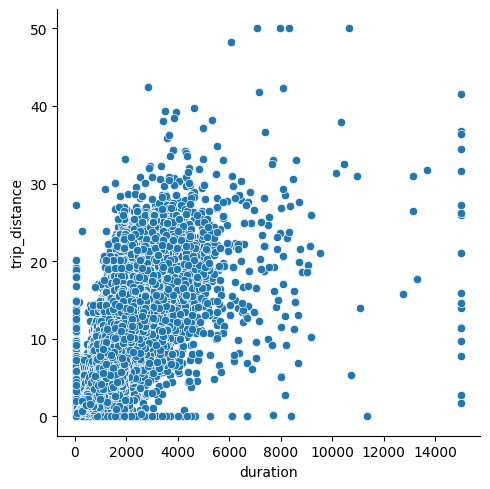

In [161]:
sns.relplot(data=df, x="duration", y="trip_distance", kind="scatter")

- The relationship between trip_distance and the trip_duration is much better now, there are still some outliers on the x_axis and y_axis, but it is much better than before.

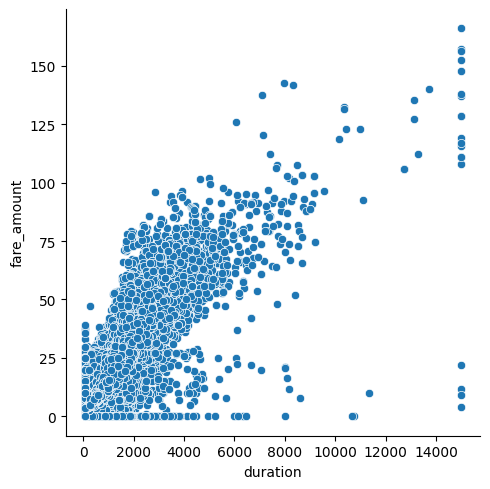

In [162]:
sns.relplot(data=df, x="duration", y="fare_amount", kind="scatter")

- The relationship between the fare amount and the trip_duration is now much better as well, we have solved the incosistency that was here.

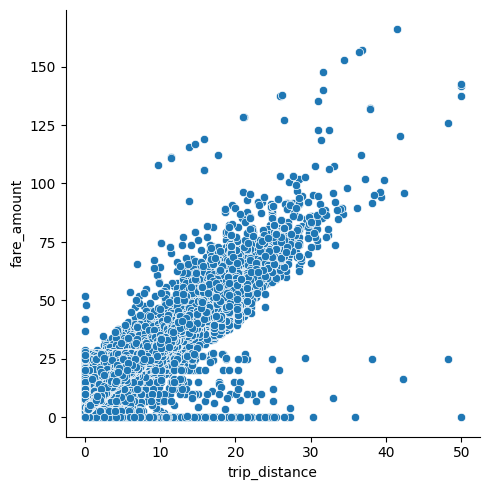

In [163]:
sns.relplot(data=df, x="trip_distance", y="fare_amount", kind="scatter")

- Also the plot between the trip_distance and the fare_amount is now better still with the existence of some outliers.

# 4 - Data transformation and feature eng.

### 1- Discertization

In [164]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [165]:
def discertize_date(df, date_feature):
    df['week_number'] = df[date_feature].dt.isocalendar().week
    df['date_range'] = df[date_feature].dt.to_period('W').astype(str)
    return df

In [166]:
df = discertize_date(df, 'pickup_datetime')

df.head()

,vendor,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,weekday,hour,state,duration,velocity,negative_money,week_number,date_range
0,VeriFone Inc.,2015-07-01 00:12:55,2015-07-01 00:16:53,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bushwick South",1.0,0.88,5.0,...,Street-hail,0,0,0,Brooklyn,238.0,0.003697,False,27,2015-06-29/2015-07-05
1,VeriFone Inc.,2015-07-01 00:38:35,2015-07-01 00:49:22,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Queens,Ridgewood",1.0,3.00,11.0,...,Street-hail,0,0,0,Brooklyn,647.0,0.004637,False,27,2015-06-29/2015-07-05
2,VeriFone Inc.,2015-07-01 00:59:01,2015-07-01 01:04:10,N,Standard rate,"Brooklyn,Bushwick North","Brooklyn,East Williamsburg",1.0,1.61,6.5,...,Street-hail,0,0,0,Brooklyn,309.0,0.005210,False,27,2015-06-29/2015-07-05
3,VeriFone Inc.,2015-07-01 00:48:41,2015-07-01 00:54:24,N,Standard rate,"Brooklyn,Brownsville","Brooklyn,East Flatbush/Remsen Village",1.0,0.00,5.0,...,Street-hail,0,0,0,Brooklyn,343.0,0.000000,False,27,2015-06-29/2015-07-05
4,VeriFone Inc.,2015-07-01 00:56:28,2015-07-01 01:07:45,N,Standard rate,"Brooklyn,East Flatbush/Remsen Village","Brooklyn,Brownsville",1.0,0.00,8.0,...,Street-hail,0,0,0,Brooklyn,677.0,0.000000,False,27,2015-06-29/2015-07-05


- This discertization is considered as Equal bin size discertization, the date_range which represents the bin is of equal size always which is the range of one week the satrt and the end.
- The week number here is the number of the week starting from the begining of the year.
- The week number is left as it is from the start of the year, to avoid many inconsitiences in case of integrating with other datasets from different months for the NYC taxi datasets.


### 2- Encoding

In [167]:
df.dtypes

vendor                           object
pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
store_and_fwd_flag               object
rate_type                        object
pu_location                      object
do_location                      object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                         int64
improvement_surcharge           float64
total_amount                    float64
payment_type                     object
trip_type                        object
congestion_surcharge              int64
weekday                           int64
hour                              int64
state                            object
duration                        float64
velocity                        float64


In [168]:
df.nunique()

vendor                         2
pickup_datetime          1115418
dropoff_datetime         1146896
store_and_fwd_flag             2
rate_type                      7
pu_location                  233
do_location                  260
passenger_count                6
trip_distance               1026
fare_amount                55018
extra                          3
mta_tax                        4
tip_amount                  1223
tolls_amount                   3
ehail_fee                      1
improvement_surcharge          2
total_amount                7151
payment_type                   5
trip_type                      3
congestion_surcharge           1
weekday                        7
hour                          24
state                          7
duration                   11337
velocity                  370262
negative_money                 2
week_number                    5
date_range                     5
dtype: int64

- We have here the categorical and string representation feaatures that need to be encoded are:
    - Vendor ( 2 )
    - store and forward flag ( 2 )
    - Rate type ( 8 )
    - Pickup Location ( 234 )
    - Dropoff Location( 261 )
    - Payment type ( 7 )
    - Trip type ( 4 )

- The Vendor and the store and forward flag, since they have very small number of unique values then they can be one hot encoded taking advantage of the very small number of unique values and since they don't have any order between them that could be interpreted wrongly then they can be one hot encoded easily.

- Other features can be label encoded because they relatively have more number of unique values in that case and could lead to huge increase in the dataset size in that case, Although these other features don't have any order in them as well ( maybe the rate type only is ordered in the base fare but the order is not maintained on all the values ), but i will label encode them for memory and dataset size saving here.

- Pickup location and Dropoff Locations will be encoded after the integration with the GPS coordinates.

In [169]:
one_hot_encode_features = ['vendor', 'store_and_fwd_flag']

df = pd.get_dummies(df, columns=one_hot_encode_features)

df.head()

,pickup_datetime,dropoff_datetime,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,state,duration,velocity,negative_money,week_number,date_range,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2015-07-01 00:12:55,2015-07-01 00:16:53,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bushwick South",1.0,0.88,5.0,0.5,0.5,...,Brooklyn,238.0,0.003697,False,27,2015-06-29/2015-07-05,False,True,True,False
1,2015-07-01 00:38:35,2015-07-01 00:49:22,Standard rate,"Brooklyn,Williamsburg (South Side)","Queens,Ridgewood",1.0,3.00,11.0,0.5,0.5,...,Brooklyn,647.0,0.004637,False,27,2015-06-29/2015-07-05,False,True,True,False
2,2015-07-01 00:59:01,2015-07-01 01:04:10,Standard rate,"Brooklyn,Bushwick North","Brooklyn,East Williamsburg",1.0,1.61,6.5,0.5,0.5,...,Brooklyn,309.0,0.005210,False,27,2015-06-29/2015-07-05,False,True,True,False
3,2015-07-01 00:48:41,2015-07-01 00:54:24,Standard rate,"Brooklyn,Brownsville","Brooklyn,East Flatbush/Remsen Village",1.0,0.00,5.0,0.5,0.5,...,Brooklyn,343.0,0.000000,False,27,2015-06-29/2015-07-05,False,True,True,False
4,2015-07-01 00:56:28,2015-07-01 01:07:45,Standard rate,"Brooklyn,East Flatbush/Remsen Village","Brooklyn,Brownsville",1.0,0.00,8.0,0.5,0.5,...,Brooklyn,677.0,0.000000,False,27,2015-06-29/2015-07-05,False,True,True,False


In [170]:
def label_encode(df, lookup, features_to_be_encoded):

    for feature in features_to_be_encoded:

        unique_values = df[feature].unique()

        label_encoding = {label: i for i, label in enumerate(unique_values)}

        df[feature] = df[feature].map(label_encoding)
        
        #Updating the lookup table
        new_rows = pd.DataFrame([{'Column name': feature, 'Original value': value, 'Imputed value': label_encoding[value]} for value in unique_values])
        lookup = pd.concat([lookup, new_rows])
        #print(lookup)
    return lookup




In [171]:
label_features = ['rate_type', 'payment_type', 'trip_type']

lookup = label_encode(df, lookup, ['rate_type', 'payment_type', 'trip_type'])

df.head()

,pickup_datetime,dropoff_datetime,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,state,duration,velocity,negative_money,week_number,date_range,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2015-07-01 00:12:55,2015-07-01 00:16:53,0,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bushwick South",1.0,0.88,5.0,0.5,0.5,...,Brooklyn,238.0,0.003697,False,27,2015-06-29/2015-07-05,False,True,True,False
1,2015-07-01 00:38:35,2015-07-01 00:49:22,0,"Brooklyn,Williamsburg (South Side)","Queens,Ridgewood",1.0,3.00,11.0,0.5,0.5,...,Brooklyn,647.0,0.004637,False,27,2015-06-29/2015-07-05,False,True,True,False
2,2015-07-01 00:59:01,2015-07-01 01:04:10,0,"Brooklyn,Bushwick North","Brooklyn,East Williamsburg",1.0,1.61,6.5,0.5,0.5,...,Brooklyn,309.0,0.005210,False,27,2015-06-29/2015-07-05,False,True,True,False
3,2015-07-01 00:48:41,2015-07-01 00:54:24,0,"Brooklyn,Brownsville","Brooklyn,East Flatbush/Remsen Village",1.0,0.00,5.0,0.5,0.5,...,Brooklyn,343.0,0.000000,False,27,2015-06-29/2015-07-05,False,True,True,False
4,2015-07-01 00:56:28,2015-07-01 01:07:45,0,"Brooklyn,East Flatbush/Remsen Village","Brooklyn,Brownsville",1.0,0.00,8.0,0.5,0.5,...,Brooklyn,677.0,0.000000,False,27,2015-06-29/2015-07-05,False,True,True,False


In [172]:
lookup

,Column name,Original value,Imputed value
0,Passenger Count,222,2
0,Ehail Fee,Nan,0
0,Congestion Surcharge,Nan,0
0,rate_type,Standard rate,0
1,rate_type,Negotiated fare,1
2,rate_type,JFK,2
3,rate_type,Nassau or Westchester,3
4,rate_type,Newark,4
5,rate_type,Group ride,5
6,rate_type,Unknown,6


In [173]:
locations_lookup

,Column name,Original value,Imputed value


- Now we have encoded all the categorical (string representation ) attributes and updated the lookuptable as well.
- We have seperated the original lookup table from another lookup table special for the locations only, because the unique values of the locations is very large number so we had two different lookup tables one normal for the dataset, and the other for the locations encoding only.

### 3- Feature Engineering

- New Features that were added in the EDA part:
    - Duration of the trip (in seconds)
    - Average velocity of the taxi in this trip (miles per second)
    - The weekday this trip was pickedup, and this will add a new feature representing the day in the week this trip was taken.
        - The weekday is indexed as follows : 0 = Wednesday, 1 = Thursday, 2 = Friday ......
    - hour: the hour that the trip started in the day (0 -> 24 (excluded))

- New Features that were added in the Cleaning part:
    - Negative Money : Boolean flag, representing wether the money in this row was negative before because this may indicate a refund or dipute or no charge in that case, 
    so if the analyst or MLE wanted to revert back to the original sign he can.

- New Features to be added Now : 
    - Wether thee trip was on a weekend or not.
    - Trip time : if the trip is morning, adternoon, rush hour, or midnight -> It is a discertization for the new added feature (hour) that represents the hour of the start of the trip.
    - Now the hour feature is not needed, it can be infered from the datetime and it was discertized into timeframes so i will drop it.

     


In [174]:
df['is_weekend_trip'] = ((df['weekday'] == 4) | (df['weekday'] == 5))


In [175]:
def categorize_trip_pickup_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Rush Hour'
    elif 20 <= hour < 24:
        return 'Night'
    else:
        return 'After Midnight'

In [176]:
df['trip_period'] = df['hour'].apply(categorize_trip_pickup_hour)

df = df.drop('hour', axis=1)

In [177]:
df.head()


,pickup_datetime,dropoff_datetime,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,velocity,negative_money,week_number,date_range,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,store_and_fwd_flag_N,store_and_fwd_flag_Y,is_weekend_trip,trip_period
0,2015-07-01 00:12:55,2015-07-01 00:16:53,0,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bushwick South",1.0,0.88,5.0,0.5,0.5,...,0.003697,False,27,2015-06-29/2015-07-05,False,True,True,False,False,After Midnight
1,2015-07-01 00:38:35,2015-07-01 00:49:22,0,"Brooklyn,Williamsburg (South Side)","Queens,Ridgewood",1.0,3.00,11.0,0.5,0.5,...,0.004637,False,27,2015-06-29/2015-07-05,False,True,True,False,False,After Midnight
2,2015-07-01 00:59:01,2015-07-01 01:04:10,0,"Brooklyn,Bushwick North","Brooklyn,East Williamsburg",1.0,1.61,6.5,0.5,0.5,...,0.005210,False,27,2015-06-29/2015-07-05,False,True,True,False,False,After Midnight
3,2015-07-01 00:48:41,2015-07-01 00:54:24,0,"Brooklyn,Brownsville","Brooklyn,East Flatbush/Remsen Village",1.0,0.00,5.0,0.5,0.5,...,0.000000,False,27,2015-06-29/2015-07-05,False,True,True,False,False,After Midnight
4,2015-07-01 00:56:28,2015-07-01 01:07:45,0,"Brooklyn,East Flatbush/Remsen Village","Brooklyn,Brownsville",1.0,0.00,8.0,0.5,0.5,...,0.000000,False,27,2015-06-29/2015-07-05,False,True,True,False,False,After Midnight


- The new added feature of the trip_period is string representation, so it needs to be encoded as well, so i will make a label encoding in here because the data is ordinal having an order here based on the hour of the pickup.

In [178]:
lookup = label_encode(df, lookup, ['trip_period'])

df.head()

,pickup_datetime,dropoff_datetime,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,velocity,negative_money,week_number,date_range,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,store_and_fwd_flag_N,store_and_fwd_flag_Y,is_weekend_trip,trip_period
0,2015-07-01 00:12:55,2015-07-01 00:16:53,0,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bushwick South",1.0,0.88,5.0,0.5,0.5,...,0.003697,False,27,2015-06-29/2015-07-05,False,True,True,False,False,0
1,2015-07-01 00:38:35,2015-07-01 00:49:22,0,"Brooklyn,Williamsburg (South Side)","Queens,Ridgewood",1.0,3.00,11.0,0.5,0.5,...,0.004637,False,27,2015-06-29/2015-07-05,False,True,True,False,False,0
2,2015-07-01 00:59:01,2015-07-01 01:04:10,0,"Brooklyn,Bushwick North","Brooklyn,East Williamsburg",1.0,1.61,6.5,0.5,0.5,...,0.005210,False,27,2015-06-29/2015-07-05,False,True,True,False,False,0
3,2015-07-01 00:48:41,2015-07-01 00:54:24,0,"Brooklyn,Brownsville","Brooklyn,East Flatbush/Remsen Village",1.0,0.00,5.0,0.5,0.5,...,0.000000,False,27,2015-06-29/2015-07-05,False,True,True,False,False,0
4,2015-07-01 00:56:28,2015-07-01 01:07:45,0,"Brooklyn,East Flatbush/Remsen Village","Brooklyn,Brownsville",1.0,0.00,8.0,0.5,0.5,...,0.000000,False,27,2015-06-29/2015-07-05,False,True,True,False,False,0


In [179]:
lookup

,Column name,Original value,Imputed value
0,Passenger Count,222,2
0,Ehail Fee,Nan,0
0,Congestion Surcharge,Nan,0
0,rate_type,Standard rate,0
1,rate_type,Negotiated fare,1
2,rate_type,JFK,2
3,rate_type,Nassau or Westchester,3
4,rate_type,Newark,4
5,rate_type,Group ride,5
6,rate_type,Unknown,6


- Last point in the Feature Eng.
    - All the new added features are good and ok, but only the velocity was added in the EDA part, and we handled inconsistencies and accuracy problems in the trip distance and duration (factors in the velocity), so this may lead to inconsistent data here.
        - So we need to recompute the velcoity again.
    
    - We introduced a feature called state representing the state of the pick up location of the trip for answering a question in the EDA, this feature is no longer needed, so i will drop it.


In [180]:
df.velocity = df.trip_distance / df.duration

df = df.drop('state', axis=1)

In [181]:
df.head()

,pickup_datetime,dropoff_datetime,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,velocity,negative_money,week_number,date_range,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,store_and_fwd_flag_N,store_and_fwd_flag_Y,is_weekend_trip,trip_period
0,2015-07-01 00:12:55,2015-07-01 00:16:53,0,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bushwick South",1.0,0.88,5.0,0.5,0.5,...,0.003697,False,27,2015-06-29/2015-07-05,False,True,True,False,False,0
1,2015-07-01 00:38:35,2015-07-01 00:49:22,0,"Brooklyn,Williamsburg (South Side)","Queens,Ridgewood",1.0,3.00,11.0,0.5,0.5,...,0.004637,False,27,2015-06-29/2015-07-05,False,True,True,False,False,0
2,2015-07-01 00:59:01,2015-07-01 01:04:10,0,"Brooklyn,Bushwick North","Brooklyn,East Williamsburg",1.0,1.61,6.5,0.5,0.5,...,0.005210,False,27,2015-06-29/2015-07-05,False,True,True,False,False,0
3,2015-07-01 00:48:41,2015-07-01 00:54:24,0,"Brooklyn,Brownsville","Brooklyn,East Flatbush/Remsen Village",1.0,0.00,5.0,0.5,0.5,...,0.000000,False,27,2015-06-29/2015-07-05,False,True,True,False,False,0
4,2015-07-01 00:56:28,2015-07-01 01:07:45,0,"Brooklyn,East Flatbush/Remsen Village","Brooklyn,Brownsville",1.0,0.00,8.0,0.5,0.5,...,0.000000,False,27,2015-06-29/2015-07-05,False,True,True,False,False,0


### 4- Normalisation

In [182]:
df.describe(include=[int, float])

,rate_type,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,weekday,duration,velocity,trip_period
count,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06,1541671.0,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06,1541671.0,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06
mean,3.544141e-02,1.374468e+00,2.883426e+00,1.190414e+01,4.396710e-01,4.874117e-01,1.065907e+00,1.139074e-01,0.0,2.923435e-01,1.430338e+01,5.699400e-01,2.389874e-02,0.0,2.745796e+00,7.403318e+02,3.720835e-03,2.117393e+00
std,2.342727e-01,1.047335e+00,2.802058e+00,7.958106e+00,3.844151e-01,9.634959e-02,1.695131e+00,7.884730e-01,0.0,4.731098e-02,9.014029e+00,5.202226e-01,1.529121e-01,0.0,1.904024e+00,5.206720e+02,2.893286e-03,1.376957e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.0,3.000000e-01,8.160000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,3.640000e+02,2.680608e-03,1.000000e+00
50%,0.000000e+00,1.000000e+00,1.970000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,0.0,3.000000e-01,1.130000e+01,1.000000e+00,0.000000e+00,0.0,3.000000e+00,6.080000e+02,3.353151e-03,2.000000e+00
75%,0.000000e+00,1.000000e+00,3.700000e+00,1.500000e+01,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,0.0,3.000000e-01,1.780000e+01,1.000000e+00,0.000000e+00,0.0,4.000000e+00,9.940000e+02,4.263410e-03,3.000000e+00
max,6.000000e+00,6.000000e+00,5.000000e+01,1.659818e+02,1.000000e+00,4.950000e+01,9.297399e+00,5.814438e+00,0.0,3.000000e-01,1.672800e+02,4.000000e+00,2.000000e+00,0.0,6.000000e+00,1.500000e+04,4.533333e-01,4.000000e+00


- For the features Trip Distance, Trip Duration, Velocity, Fare amount and Total Amount.
    - We can notice that the standard deviation (spread of the data and disperssion from the mean) is different in these attributes here.
    - also the ranges differ here.
    - So if training a ML model, it will be deceived from this different ranges, thinking about giving more weights to the features of the larger value and they actually have nothning to do with the decision making for the prediction of the model.

- In our scenario here, we can see that:
    - Duration has very large standard deviation here as well as the velocity:
        - So, i will change the duration to be minutes instead of seconds, as well as recomputation of the velocity.
        - The velocity now will be miles per minutes.
    - Fare amount relative to the trip distance also has large standard deviation: 
        - But i will not scale or normalize, Because
            - I don't want to play with the real distribution of the data after handling the inconsistencies and noisy data.
            - The data may be used for analytics, so it is better to have the original values so it gives a meaning when drawing insights and showing insights to stakeholders.
            - The data after normalization or scaling won't make any sense if it is used for showing the insights to the stakeholders.
            - For ML, if the Model needs the attributes to be normalized, the MLE can do so after loading the data, it will be the only remaining step.
            - Other than that the data like that will be ready for analytics and ML. 

In [183]:
df['duration'] = df['duration'] / 60

df.velocity = df.trip_distance / df.duration


In [184]:
df.describe(include=[int, float])

,rate_type,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,weekday,duration,velocity,trip_period
count,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06,1541671.0,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06,1541671.0,1.541671e+06,1.541671e+06,1.541671e+06,1.541671e+06
mean,3.544141e-02,1.374468e+00,2.883426e+00,1.190414e+01,4.396710e-01,4.874117e-01,1.065907e+00,1.139074e-01,0.0,2.923435e-01,1.430338e+01,5.699400e-01,2.389874e-02,0.0,2.745796e+00,1.233886e+01,2.232501e-01,2.117393e+00
std,2.342727e-01,1.047335e+00,2.802058e+00,7.958106e+00,3.844151e-01,9.634959e-02,1.695131e+00,7.884730e-01,0.0,4.731098e-02,9.014029e+00,5.202226e-01,1.529121e-01,0.0,1.904024e+00,8.677866e+00,1.735972e-01,1.376957e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.0,3.000000e-01,8.160000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,6.066667e+00,1.608365e-01,1.000000e+00
50%,0.000000e+00,1.000000e+00,1.970000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,0.0,3.000000e-01,1.130000e+01,1.000000e+00,0.000000e+00,0.0,3.000000e+00,1.013333e+01,2.011891e-01,2.000000e+00
75%,0.000000e+00,1.000000e+00,3.700000e+00,1.500000e+01,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,0.0,3.000000e-01,1.780000e+01,1.000000e+00,0.000000e+00,0.0,4.000000e+00,1.656667e+01,2.558046e-01,3.000000e+00
max,6.000000e+00,6.000000e+00,5.000000e+01,1.659818e+02,1.000000e+00,4.950000e+01,9.297399e+00,5.814438e+00,0.0,3.000000e-01,1.672800e+02,4.000000e+00,2.000000e+00,0.0,6.000000e+00,2.500000e+02,2.720000e+01,4.000000e+00


- The standard devitaion of the duration now has decreased from 520 to 8.6 (which is way more acceptaable).
- The standard deviation of the velocity has increased from 0.0002 to 0.17. 

- Side Note : The STD of the velocity was too small because the range of values was very very small because it was miles per second.

### 5- Adding GPS Coordinates

- I made a python script, outside this notebook that gets for each location in the dataset the corresponding GPS coordinates.
- I used MapQuest API.
- You can find the script on the google drive link submitted as well.

In [185]:
coordinates_df = pd.read_csv('../data/coordinates_data.csv')

coordinates_df

,location,lat,lon
0,"Manhattan,Chinatown",40.71646,-73.99676
1,"Bronx,Woodlawn/Wakefield",53.67994,-1.51033
2,"Brooklyn,Boerum Hill",40.68372,-73.98179
3,"Queens,Willets Point",40.77723,-73.81358
4,"Brooklyn,Starrett City",40.65044,-73.88448
...,...,...,...
253,"Manhattan,East Harlem South",40.79828,-73.94081
254,"Bronx,Mott Haven/Port Morris",40.80849,-73.93065
255,"Manhattan,Manhattanville",40.80885,-73.95403
256,"Bronx,University Heights/Morris Heights",40.85183,-73.91626


In [186]:
def integrate_coordinates(df, coordinates_df, join_key):
    df = df.merge(coordinates_df, left_on=join_key, right_on='location', how='left')
    df = df.drop('location', axis=1)
    df = df.rename(columns={'lon': join_key + '_longtitude', 'lat': join_key+'_latitude'})
    return df




In [187]:
df = integrate_coordinates(df, coordinates_df, 'pu_location')

df = integrate_coordinates(df, coordinates_df, 'do_location')

df.head()


,pickup_datetime,dropoff_datetime,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,store_and_fwd_flag_N,store_and_fwd_flag_Y,is_weekend_trip,trip_period,pu_location_latitude,pu_location_longtitude,do_location_latitude,do_location_longtitude
0,2015-07-01 00:12:55,2015-07-01 00:16:53,0,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bushwick South",1.0,0.88,5.0,0.5,0.5,...,False,True,True,False,False,0,40.70845,-73.95351,40.69360,-73.91922
1,2015-07-01 00:38:35,2015-07-01 00:49:22,0,"Brooklyn,Williamsburg (South Side)","Queens,Ridgewood",1.0,3.00,11.0,0.5,0.5,...,False,True,True,False,False,0,40.70845,-73.95351,40.70074,-73.89509
2,2015-07-01 00:59:01,2015-07-01 01:04:10,0,"Brooklyn,Bushwick North","Brooklyn,East Williamsburg",1.0,1.61,6.5,0.5,0.5,...,False,True,True,False,False,0,40.69360,-73.91922,40.70800,-73.93990
3,2015-07-01 00:48:41,2015-07-01 00:54:24,0,"Brooklyn,Brownsville","Brooklyn,East Flatbush/Remsen Village",1.0,0.00,5.0,0.5,0.5,...,False,True,True,False,False,0,40.66290,-73.91729,40.65078,-73.91771
4,2015-07-01 00:56:28,2015-07-01 01:07:45,0,"Brooklyn,East Flatbush/Remsen Village","Brooklyn,Brownsville",1.0,0.00,8.0,0.5,0.5,...,False,True,True,False,False,0,40.65078,-73.91771,40.66290,-73.91729


- Now encoding the pickup and dropoff locations with label encoding.
- The function will update the lookup table inside it so it will be added to the lookup table.

In [188]:
locations_lookup = label_encode(df, locations_lookup, ['pu_location', 'do_location'])

df.head()

,pickup_datetime,dropoff_datetime,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,store_and_fwd_flag_N,store_and_fwd_flag_Y,is_weekend_trip,trip_period,pu_location_latitude,pu_location_longtitude,do_location_latitude,do_location_longtitude
0,2015-07-01 00:12:55,2015-07-01 00:16:53,0,0,0,1.0,0.88,5.0,0.5,0.5,...,False,True,True,False,False,0,40.70845,-73.95351,40.69360,-73.91922
1,2015-07-01 00:38:35,2015-07-01 00:49:22,0,0,1,1.0,3.00,11.0,0.5,0.5,...,False,True,True,False,False,0,40.70845,-73.95351,40.70074,-73.89509
2,2015-07-01 00:59:01,2015-07-01 01:04:10,0,1,2,1.0,1.61,6.5,0.5,0.5,...,False,True,True,False,False,0,40.69360,-73.91922,40.70800,-73.93990
3,2015-07-01 00:48:41,2015-07-01 00:54:24,0,2,3,1.0,0.00,5.0,0.5,0.5,...,False,True,True,False,False,0,40.66290,-73.91729,40.65078,-73.91771
4,2015-07-01 00:56:28,2015-07-01 01:07:45,0,3,4,1.0,0.00,8.0,0.5,0.5,...,False,True,True,False,False,0,40.65078,-73.91771,40.66290,-73.91729


- We had locations with Unknown, these locations didn't yield to any result from the api, and now these records will have the coordinates as missing.
- According to https://docs.mapbox.com/help/glossary/lat-lon/, the range of values for the latitude is -90 and 90, for the longitude we have -180 to 180.
- So I will impute the missing values of the coordinates with constant value of 200.

In [189]:
df.isna().mean()*100

pickup_datetime                             0.000000
dropoff_datetime                            0.000000
rate_type                                   0.000000
pu_location                                 0.000000
do_location                                 0.000000
passenger_count                             0.000000
trip_distance                               0.000000
fare_amount                                 0.000000
extra                                       0.000000
mta_tax                                     0.000000
tip_amount                                  0.000000
tolls_amount                                0.000000
ehail_fee                                   0.000000
improvement_surcharge                       0.000000
total_amount                                0.000000
payment_type                                0.000000
trip_type                                   0.000000
congestion_surcharge                        0.000000
weekday                                     0.

- They have very small percentage of missingness.

In [190]:
def constant_value_imputation(df, features, val):
    for feature in features:
        df[feature].fillna(val, inplace=True)

constant_value_imputation(df, ['pu_location_longtitude', 'pu_location_latitude', 'do_location_longtitude', 'do_location_latitude'], 200)
df.isna().mean()*100



pickup_datetime                             0.0
dropoff_datetime                            0.0
rate_type                                   0.0
pu_location                                 0.0
do_location                                 0.0
passenger_count                             0.0
trip_distance                               0.0
fare_amount                                 0.0
extra                                       0.0
mta_tax                                     0.0
tip_amount                                  0.0
tolls_amount                                0.0
ehail_fee                                   0.0
improvement_surcharge                       0.0
total_amount                                0.0
payment_type                                0.0
trip_type                                   0.0
congestion_surcharge                        0.0
weekday                                     0.0
duration                                    0.0
velocity                                

- Now update the lookup table with the new imputed values.

In [191]:
lookup = update_lookup(lookup, 'do_location_longtitude', 'Nan', 200)
lookup = update_lookup(lookup, 'do_location_longtitude', 'Nan', 200)
lookup = update_lookup(lookup, 'pu_location_longtitude', 'Nan', 200)
lookup = update_lookup(lookup, 'pu_location_latitude', 'Nan', 200)

In [192]:
lookup

,Column name,Original value,Imputed value
0,Passenger Count,222,2
0,Ehail Fee,Nan,0
0,Congestion Surcharge,Nan,0
0,rate_type,Standard rate,0
1,rate_type,Negotiated fare,1
2,rate_type,JFK,2
3,rate_type,Nassau or Westchester,3
4,rate_type,Newark,4
5,rate_type,Group ride,5
6,rate_type,Unknown,6


# 5 - Loading the Clean Data

## Final Check

In [193]:
df.isna().mean()*100

pickup_datetime                             0.0
dropoff_datetime                            0.0
rate_type                                   0.0
pu_location                                 0.0
do_location                                 0.0
passenger_count                             0.0
trip_distance                               0.0
fare_amount                                 0.0
extra                                       0.0
mta_tax                                     0.0
tip_amount                                  0.0
tolls_amount                                0.0
ehail_fee                                   0.0
improvement_surcharge                       0.0
total_amount                                0.0
payment_type                                0.0
trip_type                                   0.0
congestion_surcharge                        0.0
weekday                                     0.0
duration                                    0.0
velocity                                

- No data is missing. The Data is complete.

In [194]:
df.dtypes

pickup_datetime                             datetime64[ns]
dropoff_datetime                            datetime64[ns]
rate_type                                            int64
pu_location                                          int64
do_location                                          int64
passenger_count                                    float64
trip_distance                                      float64
fare_amount                                        float64
extra                                              float64
mta_tax                                            float64
tip_amount                                         float64
tolls_amount                                       float64
ehail_fee                                            int64
improvement_surcharge                              float64
total_amount                                       float64
payment_type                                         int64
trip_type                                            int

- All the data is now numeric, we don't have any string representations.

- I will reset the index of the lookup tables to be consistent, after updating it multiple times.

In [195]:
lookup = lookup.reset_index(drop=True).sort_index()

lookup

,Column name,Original value,Imputed value
0,Passenger Count,222,2
1,Ehail Fee,Nan,0
2,Congestion Surcharge,Nan,0
3,rate_type,Standard rate,0
4,rate_type,Negotiated fare,1
5,rate_type,JFK,2
6,rate_type,Nassau or Westchester,3
7,rate_type,Newark,4
8,rate_type,Group ride,5
9,rate_type,Unknown,6


In [196]:
locations_lookup = locations_lookup.reset_index(drop=True).sort_index()

locations_lookup

,Column name,Original value,Imputed value
0,pu_location,"Brooklyn,Williamsburg (South Side)",0
1,pu_location,"Brooklyn,Bushwick North",1
2,pu_location,"Brooklyn,Brownsville",2
3,pu_location,"Brooklyn,East Flatbush/Remsen Village",3
4,pu_location,"Queens,Steinway",4
...,...,...,...
488,do_location,"Staten Island,Great Kills Park",255
489,do_location,"Staten Island,Arden Heights",256
490,do_location,"Staten Island,Freshkills Park",257
491,do_location,"Queens,Jamaica Bay",258


- Renaming the columns back to have proper namings.

In [197]:
def proper_column_name(input_string):
    input_string = input_string.replace('_', ' ')
    words = input_string.split()
    formatted_words = [word.capitalize() for word in words]
    formatted_string = ' '.join(formatted_words)
    return formatted_string


df.columns = [proper_column_name(col) for col in df.columns]

df.head()

,Pickup Datetime,Dropoff Datetime,Rate Type,Pu Location,Do Location,Passenger Count,Trip Distance,Fare Amount,Extra,Mta Tax,...,"Vendor Creative Mobile Technologies, Llc",Vendor Verifone Inc.,Store And Fwd Flag N,Store And Fwd Flag Y,Is Weekend Trip,Trip Period,Pu Location Latitude,Pu Location Longtitude,Do Location Latitude,Do Location Longtitude
0,2015-07-01 00:12:55,2015-07-01 00:16:53,0,0,0,1.0,0.88,5.0,0.5,0.5,...,False,True,True,False,False,0,40.70845,-73.95351,40.69360,-73.91922
1,2015-07-01 00:38:35,2015-07-01 00:49:22,0,0,1,1.0,3.00,11.0,0.5,0.5,...,False,True,True,False,False,0,40.70845,-73.95351,40.70074,-73.89509
2,2015-07-01 00:59:01,2015-07-01 01:04:10,0,1,2,1.0,1.61,6.5,0.5,0.5,...,False,True,True,False,False,0,40.69360,-73.91922,40.70800,-73.93990
3,2015-07-01 00:48:41,2015-07-01 00:54:24,0,2,3,1.0,0.00,5.0,0.5,0.5,...,False,True,True,False,False,0,40.66290,-73.91729,40.65078,-73.91771
4,2015-07-01 00:56:28,2015-07-01 01:07:45,0,3,4,1.0,0.00,8.0,0.5,0.5,...,False,True,True,False,False,0,40.65078,-73.91771,40.66290,-73.91729


- FINALLY, Loading the Clean Data.

In [198]:
df.to_parquet('../data/green_trip_data_2015-07clean.parquet')

In [199]:
df.to_csv('../data/green_trip_data_2015-07clean.csv')

- Loading the Lookup tables.

In [200]:
lookup.to_csv('../data/lookup_table_green_taxis.csv')

In [201]:
locations_lookup.to_csv('../data/locations_lookup_table_green_taxis.csv')